# Notes

## For VLLM

I tried
```bash
git clone git@gitlab.software.imdea.org:muse-lab/vllm.git;
cd vllm/; git checkout dev-2; \
VLLM_USE_PRECOMPILED=0 pip install --editable .; \
cd ..; \
pip install "numpy<2.0.0"; \
pip install --editable . --no-deps; \
pip install transformers accelerate decord dotenv google-genai gradio; \
pip install imageio ipdb json_repair matplotlib nltk omegaconf openpyxl portalocker qwen_vl_utils sty tabulate; \
pip install xlsxwriter validators timm sty timeout-decorator opencv-python==4.7.0.72 scenedetect mistral_inference;
```

or
```bash
pip install torch==2.1.2+cu121 torchvision==0.16.2+cu121 --index-url https://download.pytorch.org/whl/cu121
```

or 
```bash
pip install vllm
```

## Packages and Installations

```bash
python3 -m venv .env; source .env/bin/activate

pip install -e .; pip install pyarrow;\
pip install fastparquet; pip install decord; pip install wheel; pip install scenedetect;\
pip install datasets; pip install ipykernel; pip install pycocoevalcap;\
pip install flash-attn --no-build-isolation;\
```

This is for running llava stuff:
```bash
pip install git+https://github.com/LLaVA-VL/LLaVA-NeXT.git;\
pip install transformers==4.37.0;
```

For Pixtral:
```bash
pip uninstall flash-attn;\
pip install mistral_inference --upgrade;\
pip install evaluate
pip install rouge_score
pip install sacrebleu
```

When I tried to use vllm for Pixtral, at some point I also used:
```bash
pip install fastchat
pip install lmdeploy
```

Added for Qwen to evaluate LLaVABench and also to Pixtral in Remus
```bash
pip install fastchat
```

In general in the project's github says that different transformers are useful for different model. From ```vlmeval/vlm/llava/llava.py```: Please ````pip install git+https://github.com/LLaVA-VL/LLaVA-NeXT.git````
maybe have to remove again for other models
I get ```OpenCLIP not installed``` so maybe will need it later

Please use ```transformers==4.37.0``` for: LLaVA series
Please use ```transformers==4.33.0``` for: Qwen series

for ```llava_video_qwen2_7b``` and ```llava_onevision_qwen2_7b_ov``` which uses the LLaVA_OneVision class I get:
```You are using a model of type llava to instantiate a model of type llava_qwen. This is not supported for all configurations of models and can yield errors.```

## Remus Project installations - might be useless

For .env_image_mc, I tried something like

```bash
python3 -m venv .env_image_mc; source .env_image_mc/bin/activate
pip install packaging
pip install wheel
pip install torch
pip install --use-pep517 -r requirements/image_multiple_choice.txt
```

but in the end I did

```bash
pip install -e .; pip install pyarrow;\
pip install fastparquet; pip install decord; pip install wheel; pip install scenedetect;\
pip install datasets; pip install ipykernel; pip install pycocoevalcap;\
pip install flash-attn --no-build-isolation;\
```

I copied the dependencies in ```requirements/image_multiple_choice_remus.txt```

For .env_llava_video I did

```bash
pip install -e .; pip install pyarrow;\
pip install fastparquet; pip install decord; pip install wheel; pip install scenedetect;\
pip install datasets; pip install ipykernel; pip install pycocoevalcap;\
pip install flash-attn --no-build-isolation;\
pip install git+https://github.com/LLaVA-VL/LLaVA-NeXT.git;\
pip install transformers==4.37.0;
```

I copied the dependencies in ```requirements/llava_video_kind_remus.txt```

For ..env_image_pixtral I did

```bash
pip install -e .; pip install pyarrow;pip install fastparquet; pip install decord; pip install wheel; pip install scenedetect;pip install datasets; pip install ipykernel; pip install pycocoevalcap;pip install flash-attn --no-build-isolation;\ pip uninstall flash-attn;pip install mistral_inference --upgrade
```

I copied the dependencies in ```requirements/requirements/image_pixtral_remus.txt```

## Huggingface Log-In

In order to be able to use some gated repos from HF, I had to copy ```.cache/huggingface/token``` into ```/srv/.../VLMEvalKitdata/.cache/huggingface/token``` and then paste in there the key hf_download_for_vlmevalkit

For HF Log-In:hf_download_for_vlmevalkit
```bash
hf auth login
```

## Potential Packages

For ```flash_attn``` : If I want to use models without flash_attn change the code in ```.env/lib/python3.11/site-packages/llava/model/builder.py``` like described later in the Files and Explanation

```bash
pip install flash-attn
```
OR
```bash
pip install flash-attn --no-build-isolation
```
which now is cached
OR
```bash
nohup bash -c 'MAX_JOBS=4 pip install flash-attn --no-build-isolation' > flash_attn_log.log 2>&1 &
```

Check the below parameters to see what preconfigured wheel I can download and install to make the procedure faster

```
python --version
    Python 3.11.2
python -c "import torch; print(torch.__version__)"
    2.8.0+cu128
python -c "import torch; print(torch.version.cuda)"
    12.8
python -c "import torch; print(torch.compiled_with_cxx11_abi())"
    True

this gets:
    flash_attn-2.8.2+cu12torch2.8cxx11abiTRUE-cp311-cp311-linux_x86_64.whl
if exist:
    wget https://github.com/Dao-AILab/flash-attention/releases/download/v2.8.2/flash_attn-2.8.2+cu12torch2.7cxx11abiTRUE-cp311-cp311-linux_x86_64.whl
    pip install flash_attn-2.8.2+cu12torch2.7cxx11abiTRUE-cp311-cp311-linux_x86_64.whl
```

## Important Notes before executing

* ```COCO_VAL``` compression datasets should run with config because I haven't added their names in ImageCaptionDataset class in ```image_caption.py```, so they are not default recognized. Through config file I provide them along with the ImageCaptionDataset dataset class and that is why it works

* in ```vlmeval/config.py```, ```Pixtral-12B``` is hard-coded to use vllm or not. there are two versions, ```mistralai/Pixtral-12B-2409``` and ```/srv/muse-lab/models/pixtral-12b```, but we prefer the first one, because it runs correctly with or without vllm. It is the original one used by the project. For running Pixtral with LLaVABench, first do the inference with vllm, and then in a second run, set the vllm of Pixtral to False and run every workload on its own without config. For some reason, it gets CUDA OOM

* Make sure you can successfully infer with the VLM before starting the evaluation with the command ```vlmutil check {MODEL_NAME}```

* ```--work-dir (str, default to '.')```: The directory to save evaluation results

* Files ending with .csv contain the evaluated metrics.

* Note: If both ```model.build_prompt()``` and ```dataset.build_prompt()``` are defined, ```model.build_prompt()``` will take precedence over ```dataset.build_prompt()```, effectively overriding it.

* run ```python run.py --help``` for details

* The default setting mentioned uses OpenAI's GPT as the judge LLM. However, you can also deploy a local judge LLM with LMDeploy.

* ```pack``` flag controls whether multiple video frames are concatenated (“packed”) into a single multi-image prompt, or whether each frame is passed individually. For example, MMBenchVideo probably supports it, but I will have to go to ```vlmeval/inference_video.py``` line 125 to comment this assertion. In general, we don't care about packing in our use-case

* ```Qwen2-VL-2B-Instruct``` responds to some open-ended questions in chinese

* In general, It is different to execute with and without config file. Check those cases

* Watch out for the ```allowed_local_media_path``` parameter when loading a vllm LLM. It is necessary to allow accesing folders

* ```Pixtral-12B``` with video datasets needs to resize the sampled frames. Check the ```smart_resize``` function

* SOS: Careful with the paths and the cached sampled frames. For example Pixtral Resizes them but the other models don't, so take care of what is read
    - Qwen and LLaVA models don't have to read frames from videos as images, so they don't save anything
    - clever sampling saves the clever sampled frames by dataset in order to be able to reuse the sampled frames because the techniques are the same for all the models

* Make sure that there have been changes in ```.env_pixtral_vllm/lib/python3.11/site-packages/vllm/v1/core/sched/scheduler.py``` for the vllm not to fail exiting big outputs. The important change is in line 819:
```bash
# Check for out of memory
max_cache_tkns = self.kv_cache_config.num_blocks * \
        self.kv_cache_manager.block_size
if request.num_computed_tokens > max_cache_tkns - 32:
    stopped = True
    # set as finished
    request.status = RequestStatus.FINISHED_LENGTH_CAPPED
```

## VLMEvalKit – Run Commands Cheat Sheet & Models and Datasets

### 🔹 Models and Datasets

Look them up in [link](https://aicarrier.feishu.cn/wiki/Qp7wwSzQ9iK1Y6kNUJVcr6zTnPe?table=tblJo6rH8ihmuLmB&view=vewIUbWice)

### 🔹 General Forms

```bash
# Using config file
python3 run.py --config <path_to_config.json> --verbose --work-dir <output_dir>

# Using dataset + model
python3 run.py --data {dataset} --model {model} --verbose [--reuse] [--work-dir <output_dir>]

nohup <path_to_venv>/bin/python3 /home/user/code/VLMEvalKit/run.py --data {dataset} --model {model} --verbose --work-dir <output_dir> [--reuse] > /home/user/code/VLMEvalKit/giannis_stuff/runner.log 2>&1 < /dev/null &

nohup <path_to_venv>/bin/python3 /home/user/code/VLMEvalKit/run.py --config <path_to_config.json> --verbose --work-dir <output_dir> [--reuse] > /home/user/code/VLMEvalKit/giannis_stuff/runner.log 2>&1 < /dev/null &
```

### 🔹 Parameters

* **`--config <path>`** → Path to JSON config file
* **`--data {dataset}`** → Dataset(s) to evaluate
* **`--model {model}`** → Model(s) to evaluate
* **`--work-dir <dir>`** → Directory for saving outputs
* **`--reuse`** → Reuse cached results (skip recomputation)
* **Extra options (some tasks only)**:

  * `--clever_sampling scene_change`
  * `--max_frames <N>`
  * `--sampling_extra_param <val>`

### 🔹 Example Datasets

* Have used
    - ```MMBench_DEV_EN``` + MCQ
    - ```COCO_VAL``` - Image Caption
* Use
    - ```Video-MME``` for video Multiple Choice
        - ```Video-MME_64frame```
    - ```LLaVABench``` for VQA
    - ```MMBench-Video``` για VQA
        - ```MMBench_Video_64frame_nopack```
        - as it comes to judging, same as ```LLaVABench```
    - ```TempCompass```
        - ```TempCompass_Captioning_64frame``` - caption generation
        - uses ```chatgpt-1106``` as judge

* Maybe for later
    - ```LLaVA-Video-Multiple-Choice```
    - ```AOKVQA_original``` - is not oficially supported - MCQ

### 🔹 Example Models

* Have used
    Οποια δεν κανουν support βιντεο θα τα τρεξουμε ως multi image, καθε frame θα ειναι ενα image
    - ```Qwen2-VL-7B-Instruct```
    - ```llava_onevision_qwen2_7b_ov```
        - ```LLaVA_OneVision(BaseModel)``` calls ```LlavaQwenForCausalLM``` in ```/home/user/code/VLMEvalKit/.env/lib/python3.11/site-packages/llava/model/language_model/llava_qwen.py```
    - ```llava_onevision_qwen2_0.5b_ov```
    - ```Pixtral-12B```
    - ```Qwen2-VL-2B-Instruct```

* Use (open source) - if enough time
    - ```InternVL2_5-8B```
    - ```InternVL2_5-4B```

* Maybe for later
    - ```Video-LLaVA-7B-HF```
    - ```LLaVA-Next-Video-(Mistral-7b)``` not finished implementing
    - ```llava_video_qwen2_7b```
    - ```llava_next_mistral_7b```

### 🔹 Output Directories

* `/srv/muse-lab/datasets/VLMEvalKitdata/outputs`

### 🔹 Config File

* `/home/user/code/VLMEvalKit/config.json`

### 🔹 Virtual Environments

* `(.env_image_mc)`
* `(.env_llava_video)`
* `(.env_image_pixtral)`
* `(.env_pixtral_vllm)`

### 🔹 Last Run

```bash
export PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True
```

```bash
python3 run.py --data Video-MME_64frame --model llava_onevision_qwen2_7b_ov --verbose --reuse --work-dir /srv/muse-lab/datasets/VLMEvalKitdata/outputs --clever_sampling motion_based --max_frames 64 --sampling_extra_param 1

python3 run.py --config /home/user/code/VLMEvalKit/config.json --verbose --work-dir /srv/muse-lab/datasets/VLMEvalKitdata/outputs

nohup .env_image_mc/bin/python3 /home/user/code/VLMEvalKit/run.py --data Video-MME_64frame --model Qwen2-VL-2B-Instruct --verbose --work-dir /srv/muse-lab/datasets/VLMEvalKitdata/outputs --reuse > /home/user/code/VLMEvalKit/giannis_stuff/runner.log 2>&1 < /dev/null &

nohup .env_pixtral_vllm/bin/python3 /home/user/code/VLMEvalKit/run.py --data TempCompass_Captioning_64frame --model Pixtral-12B --verbose --work-dir /srv/muse-lab/datasets/VLMEvalKitdata/outputs --clever_sampling scene_change --max_frames 64 --sampling_extra_param 27 --reuse > /home/user/code/VLMEvalKit/giannis_stuff/runner.log 2>&1 < /dev/null &

nohup .env_image_pixtral/bin/python3 /home/user/code/vlmevalkit/run.py --config /home/user/code/vlmevalkit/config.json --verbose --work-dir /srv/muse-lab/datasets/VLMEvalKitdata/outputs --reuse > /home/user/code/vlmevalkit/giannis_stuff/runner.log 2>&1 < /dev/null &
```

## Files and explanation

```giannis_stuff/giannis_utils.py```
- Contains functions useful for printing and preparing dataset files and such. Most are also found in other projects
- contains the ```apply_clever_sampling``` function. It doesn't take into account possible resize of frames, this would happen outside
- SOS: in the original code in ```vlmeval/vlm/llava/llava.py```, the load_video function does: return spare_frames, frame_time, video_time so here we use the ```sample_frames_by_scene_change_decord_version``` that also does this
- contains almost all the important paths
- watch how ```create_small_tsv()``` work to create the tsv files. Added a variable ```first_time``` so that when I shuffle data it doesn't change the tsv every time if it already exists
- Added ```resize_proportional()``` that is useful for models like Pixtral, which needs to resize the sampled frames' dimensions in order to be able to work with all 64 frames
    
```giannis_stuff/trails.ipynb```
- For exploring the result files, for converting data files etc. I have some useful notes in some markdowns
- !!SOS!! The tsv files with compressed images should get rid of the 'image' columns and contain a column 'image_path' with the paths to the compressed images, because otherwise it is going to read the binary images

```outputs```
- contains the results of the executions. It creates for every model run a folder that gets its name from the current date.
- If this folder exist, the model won't execute again

```vlmeval/vlm/pixtral.py```
- SOS. For MCQ I added specific MC datasets in line 118 in an if so that it adds an extra prompt to specify the task. Maybe something better can be done here. SOS
- added the ability to run with vllm for video datasets. I copied a lot from ```vlmeval/vlm/qwen2_vl/model.py```
- so far I have used normal ```pip install vllm```
- probably it cannot run more than 32 frames
- I use the model in ```/srv/muse-lab/models/pixtral-12b```
- added ability to accept clever sampling for videos. In order to be able to read videos, we need to resize the sampled frames with the variable ```RESIZED_SIZE``` in ```save_video_frames()```. Instead of this, we use ```smart_resize```. It saves the clever sampled frames in ```self.data_root``` e.g. ```/srv/muse-lab/datasets/VLMEvalKitdata/.cache/huggingface/hub/datasets--lmms-lab--Video-MME/snapshots/ead1408f75b618502df9a1d8e0950166bf0a2a0b/video_frames/fFjv93ACGo8/frame-13-scene_change-60.jpg``` for Video-MME or ```/srv/muse-lab/datasets/VLMEvalKitdata/.cache/huggingface/hub/datasets--opencompass--MMBench-Video/snapshots/ef35e21df54488715a906c7e47146f5d9f4abbed/video/video_frames/wZxzBvAgqxc``` for MMBench-Video. It takes care of different possible datasets might be used
- saves uniform sampled frames in ```/srv/muse-lab/datasets/VLMEvalKitdata/LMUData/images/Video-MME/fFjv93ACGo8/frame-64-of-64.jpg``` for example
- ```save_video_frames()``` saves frames without clever sampling in ```/srv/muse-lab/datasets/VLMEvalKitdata/LMUData/images/MMBench-Video/wZxzBvAgqxc/frame-64-of-64.jpg``` for example
- ```build_prompt``` will take care of different dataset prompts
- frame_paths is a function that is given from the dataset run and it is defined in the father class of the datasets classes
- added ```smart_resize``` based on ```.env_image_mc/lib/python3.11/site-packages/qwen_vl_utils/vision_process.py``` that defines some max pixels which I computed by experience and then it resizes them
- something important and different than the ```save_video_frames``` of initiail datasets is that our ```save_video_frames``` returns 3 items, even though most of the times, only the first - the frames are used
- MAX_PIXELS in ```save_video_frames```is important for ```smart_resize```

```.env_pixtral_vllm/lib/python3.11/site-packages/vllm/v1/core/sched/scheduler.py```
- Changed some linesaccording to the runs I made in Remus. Without them some times the vllm doesn't exit when some outputs are big.
- The file in Remus just has a few more logging.infos

```vlmeval/dataset/image_base.py```
- added the MMBench_DEV_EN subworkloads I created with compressed images
- added the same for COCO_VAL
- In lines 116 - 126 commented the md5 ifs
- i have added some ifs for the compressed datasets but maybe they are not useful since I give the files with only the paths

```/srv/muse-lab/datasets/VLMEvalKitdata```
- this is the folder in the server to be shared by the same project in both romulus and remus. this way I can save there models and shared datasets and outputs to be used in parallel by executions in romulus and remus

```vlmeval/smp/file.py```
- the LMUDataRoot() takes the LMUData_PATH variable from giannis_utils as the location of the LMUData folder

```requirements/image_pixtral.txt```
- for image multiple choice with pixtral

```requirements/image_multiple_choice.txt```
- contains the environment packages for executing the image MC like MMBench

```requirements/llava_video_kind.txt```
- contains the environment packages for llava-related video tasks

```vlmeval/dataset/image_mcq.py```
- added the MMBench_DEV_EN subworkloads I created with compressed images 

```vlmeval/dataset/llava_video_dataset.py```
- contains the class for our own MultipleChoice LLaVa Dataset

```vlmeval/dataset/tempcompass.py```
- commented the MD5 checks in line 288 for TempCompass_Captioning prepare_dataset

```vlmeval/dataset/utils/llavabench.py```
- made changes to be able to use our local llama model as a judge
- I changed the rule dictionary that is used as instructions to the judge to evaluate the results because in the beginning it created big results not exactly following what I wantd
- still, the results are not as good as I want, so I changed ```parse_score()``` to do some response parsing to keep only the scores from the responses the model tended to return. It also returns possible reviews that weren't accounted correctly
- I created the ```build_prompt_llama_judge()``` function that better prepares prompts for llama local judge

```vlmeval/dataset/video_dataset_config.py```
- added our ```LLaVA-Video-Multiple-Choice``` as new dataset
- DEFINES DATASET NAMES
- also defines the frames that are given as parameters for initial datasets
- added ```TempCompass_Captioning_64frame``` for TempCompass Captioning
- added ```TempCompass_Captioning_32frame``` for TempCompass Captioning

```vlmeval/dataset/image_vqa.py```
- I made some changes to be able to judge LLaVABench with out meta-llama judge
- I imported ```build_prompt_llama_judge``` and used our local llama as new default judge, no matter what is given in ```run.py```
- I ommited the assertion in ```evaluate()``` that checks if there exists an OPENAI API keyand used ```build_prompt_llama_judge```
- I added the compressed LLaVABench datasets in ```DATASET_URL``` of ```class LLaVABench(ImageBaseDataset)```
- it will create another column for the result file which contains possible review that didn't return correctly in column ```fail_review``
- added functionality to call the judge with vllm flag. according to vllm or not, evaluation uses different functions

```vlmeval/dataset/videomme.py```
- commented the MD5 checks and added some comments
- in VideoMME->save_video_frames the video_llm is the parameter that decides if the model reads videos, otherwise we save frames to be used as images
- I changed ```frame_paths = self.frame_paths(video)``` to also provide a video_llm parameter so we can avoid making useless folders

```vlmeval/vlm/qwen2_vl/model.py```
- added changes in order to be able to apply clever sampling on qwen video tasks. some functions are from ```.env_image_mc/lib/python3.11/site-packages/qwen_vl_utils/vision_process.py```. the changes are in order to match with the previous version of video tasks by qwen
- in ```process_vision_info_clever_sampling``` added some code from ```.env_image_mc/lib/python3.11/site-packages/qwen_vl_utils/vision_process.py``` in order to do for clever sampled videos what also happens in default uniform. This is to do some clever resizing like in ```qwen_vl_utils```
- Qwen models don't have to save uniform sampled frames from videos. Thay can read Videos as they are

```giannis_stuff/run_video_configs.sh```
- contains running the video tasks for multiple parameters and techniques
- take care of the log files it creates
- watch the paths

```vlmeval/dataset/video_base.py```
- changed ```frame_paths``` function by adding video_llm which will help avoid making unecessary folders

```vlmeval/vlm/llava/llava.py```
- SOS line 274 commented ```use_flash_attention_2```
- load_video of LLaVA_OneVision is to take care of the sampling technique
- maybe take care of the other model classes like the onevision
- in ```generate_inner_video``` the ```time_instruciton``` when we use other techniques needs to be correct as it was with baseline
- in ```generate_inner_video``` I changed the ```cont = self.model.generate``` adding pad_token_id to overcome:
```The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.```
- in ```__init__``` I added if tokenizer.pad_token is None: for the same reason
- line 590 added an if to check if I will have to specify using MC prompt for image or video. I added the MMBEnch and Video-MME as category. The model on the task is superior if we add this if
- The LLaVA_OneVision models we use don't save frames from uniformly sampled videos somewhere

```run.py```
- If a dataset is not supported it prints it in ```build_dataset(dataset_name, **dataset_kwargs)``` and tries to load it with a default way
- added arguments for supporting video clever sampling
- SOS added os.environ options in the beginning to make huggingface save stuff in srv/muse-lab
- added a list operation after ```prev_result_files = fetch_aux_files(osp.join(root, result_file_base))``` to make sure when I give an image dataset from which I have also created compressions, it doesn't also return all the compressed ones
- added ```judge_kwargs['use_vllm']``` for using judge models with vllm

```vlmeval/dataset/__init__.py```
- added import for ```LLavaVideoMCQDataset```
- DEFINES DATASET NAMES
- line 288 commented so that I can give ```AOKVQA_original``` as MCQA dataset

```vlmeval/config.py```
- DEFINES ALL MODEL-VLM NAMES
- from here use the model name specified in supported_VLM
- ```Pixtral-12B``` uses vllm in some cases which is hard-coded here. SOS

```vlmeval/api/hf_chat_model.py```
- contains the implementation for ```HFChatModel``` class which I used for our judge. I made some changes
- I made a change in the init so when I use the ```/srv/muse-lab/models/Llama-2-7b-chat-hf``` as a judge, it loads it with ```LoadModel.from_pretrained```
- I also changed for the same reasons the ```generate_str()``` function
- added functionality to be able to use vllm with the judge
- implemented batch and inner generation with vllm

```vlmeval/vlm/qwen2_vl/prompt.py```
- line 92: changed the multiple choice instruction hard-coded

```vlmeval/dataset/utils/judge_util.py```
- For our models and datasets I will use ```/srv/muse-lab/models/Llama-2-7b-chat-hf``` as a judge. To do this, I changed the ifs in ```build_judge()``` to use ```HFChatModel``` class
- Line 14: ```LOCAL_LLM = os.environ.get('LOCAL_LLM', "/srv/muse-lab/models/Llama-2-7b-chat-hf")``` difines the judge for all the executions

```vlmeval/inference_video.py```
- changed infer_data and infer_data_job_video so they can support clever sampling. They jsut receive some extra parameters and arquments that they send through and later the model takes care of them

```.env/lib/python3.11/site-packages/llava/model/builder.py```
- changed line 228 to be able to execute without flash attention:
```python
# model = LlavaQwenForCausalLM.from_pretrained(model_path, low_cpu_mem_usage=True, attn_implementation=attn_implementation, **kwargs)
###################################################
# https://huggingface.co/togethercomputer/LLaMA-2-7B-32K/discussions/15
model = LlavaQwenForCausalLM.from_pretrained(model_path, low_cpu_mem_usage=True,
                                        #  attn_implementation=attn_implementation,
                                        **kwargs, trust_remote_code=False)
###################################################
```

```giannis_stuff/runner_logs/flash_attn_log.log```
- the output of installing flash-attn

```.env/lib/python3.11/site-packages/llava/model/__init__.py```
- maybe can put the below or something similar
```python
# from .model import LlavaLlamaForCausalLM
from .model.language_model.llava_qwen import LlavaLlamaForCausalLM
```

## Add project to GitLab And How to Push (ChatGPT)

### ✅ Step 1: Create a new empty repo on GitLab

1. Log in to your GitLab account.
2. Click **New project** → **Create blank project**.
3. Give it a name, e.g. `VLMEvalKit`.
4. Leave it empty (no README, no .gitignore), so you can push into it cleanly.

GitLab will give you a remote URL like:

* HTTPS: `https://gitlab.com/<your-username>/VLMEvalKit.git`
* or SSH: `git@gitlab.com:<your-username>/VLMEvalKit.git`

---

### ✅ Step 2: Point your local repo to GitLab

In your local clone (on your PC), you’re currently pointing to the GitHub remote. You’ll add GitLab as a new remote:

```bash
cd path/to/VLMEvalKit
# Check your current remotes
git remote -v

# Add GitLab as a new remote
git remote add gitlab https://gitlab.com/<your-username>/VLMEvalKit.git
# Or if you use SSH:
# git remote add gitlab git@gitlab.com:<your-username>/VLMEvalKit.git
```

---

### ✅ Step 3: Push your branch to GitLab

Now push your local branch `first_trial`:

```bash
git push gitlab first_trial
```

If you also want the default `main` (or `master`) to exist in GitLab:

```bash
git push gitlab main
```

---

### ✅ Step 4: Use your GitLab repo everywhere

From now on, anywhere you want to use it (e.g., on your work server):

```bash
git clone https://gitlab.com/<your-username>/VLMEvalKit.git
cd VLMEvalKit
git checkout first_trial
```

---

### 🔎 Notes

* If you want to **ditch the GitHub remote completely** (so only GitLab is used):

```bash
git remote remove origin
git remote rename gitlab origin
```

* Otherwise, you can keep both (GitHub + GitLab) and push to either.

---

## To add LLaVA_Next_Video_Muse_Lab_HF dataset

- remove from ```gitignore``` the ```vlmeval/vlm/llava_next_vido``` line

Files were:

```vlmeval/vlm/llava_next_vido folder```
- ```vlmeval/vlm/llava_next_vido/__init__.py```
- ```vlmeval/vlm/llava_next_vido/llava_next_video.py```
    - contains the stuff needed for the ```LLaVA_Next_Video_Muse_Lab_HF``` that I started implementing
    - I left it for now

If I want to write it, I will have to add:

```vlmeval/vlm/__init__.py```
- ```from .llava_next_vido import LLaVA_Next_Video_Muse_Lab_HF```
```vlmeval/config.py```
- line for example 612 in llava_series:
    ```python
    "LLaVA_Next_Video_Muse_Lab_HF": partial(
        LLaVA_Next_Video_Muse_Lab_HF, model_path="llava-hf/LLaVA-NeXT-Video-7B-32K-hf"
    ),
    ```

## For config.json

```json
{
    "model": {
        "llava_onevision_qwen2_7b_ov": {
            "class": "LLaVA_OneVision",
            "model_path": "lmms-lab/llava-onevision-qwen2-7b-ov"
        }
    },
    "model": {
        "Qwen2-VL-7B-Instruct": {
            "class": "Qwen2VLChat",
            "model_path": "Qwen/Qwen2-VL-7B-Instruct"
        }
    },
    "model": {
        "Qwen2-VL-2B-Instruct": {
            "class": "Qwen2VLChat",
            "model_path": "Qwen/Qwen2-VL-2B-Instruct"
        }
    },
    "model": {
        "llava_onevision_qwen2_0.5b_ov": {
            "class": "LLaVA_OneVision",
            "model_path": "lmms-lab/llava-onevision-qwen2-0.5b-ov"
        }
    },
    "model": {
        "Pixtral-12B": {
            "class": "Pixtral",
            "model_path": "mistralai/Pixtral-12B-2409"
        }
    },
}
{
    "model": {
        "llava_next_mistral_7b": {
            "class": "LLaVA_Next"
        },
        "llava_next_llama3": {
            "class": "LLaVA_Next"
        }
    },
    "data": {
        "MMBench_DEV_EN_bdp_lan_rgb_09": {
            "class": "ImageMCQDataset",
            "dataset": "MMBench_DEV_EN_bdp_lan_rgb_09"
        },
        "MMBench_DEV_EN": {
            "class": "ImageMCQDataset",
            "dataset": "MMBench_DEV_EN"
        },
    },

    "AOKVQA_original": {
        "class": "ImageMCQDataset",
        "dataset": "AOKVQA_original"
    },
    "AOKVQA_original_bdp_lan_rgb_00": {
        "class": "ImageMCQDataset",
        "dataset": "AOKVQA_original_bdp_lan_rgb_00"
    }
}




"MMBench_DEV_EN": {
            "class": "ImageMCQDataset",
            "dataset": "MMBench_DEV_EN"
        },
        "MMBench_DEV_EN_bdp_lan_rgb_00": {
            "class": "ImageMCQDataset",
            "dataset": "MMBench_DEV_EN_bdp_lan_rgb_00"
        },
        "MMBench_DEV_EN_bdp_lan_rgb_01": {
            "class": "ImageMCQDataset",
            "dataset": "MMBench_DEV_EN_bdp_lan_rgb_01"
        },
        "MMBench_DEV_EN_bdp_lan_rgb_02": {
            "class": "ImageMCQDataset",
            "dataset": "MMBench_DEV_EN_bdp_lan_rgb_02"
        },
        "MMBench_DEV_EN_bdp_lan_rgb_03": {
            "class": "ImageMCQDataset",
            "dataset": "MMBench_DEV_EN_bdp_lan_rgb_03"
        },
        "MMBench_DEV_EN_bdp_lan_rgb_04": {
            "class": "ImageMCQDataset",
            "dataset": "MMBench_DEV_EN_bdp_lan_rgb_04"
        },
        "MMBench_DEV_EN_bdp_lan_rgb_05": {
            "class": "ImageMCQDataset",
            "dataset": "MMBench_DEV_EN_bdp_lan_rgb_05"
        },
        "MMBench_DEV_EN_bdp_lan_rgb_06": {
            "class": "ImageMCQDataset",
            "dataset": "MMBench_DEV_EN_bdp_lan_rgb_06"
        },
        "MMBench_DEV_EN_bdp_lan_rgb_07": {
            "class": "ImageMCQDataset",
            "dataset": "MMBench_DEV_EN_bdp_lan_rgb_07"
        },
        "MMBench_DEV_EN_bdp_lan_rgb_08": {
            "class": "ImageMCQDataset",
            "dataset": "MMBench_DEV_EN_bdp_lan_rgb_08"
        },
        "MMBench_DEV_EN_bdp_lan_rgb_09": {
            "class": "ImageMCQDataset",
            "dataset": "MMBench_DEV_EN_bdp_lan_rgb_09"
        },
        "COCO_VAL": {
            "class": "ImageCaptionDataset",
            "dataset": "COCO_VAL"
        },
        "COCO_VAL_bdp_lan_rgb_00": {
            "class": "ImageCaptionDataset",
            "dataset": "COCO_VAL_bdp_lan_rgb_00"
        },
        "COCO_VAL_bdp_lan_rgb_01": {
            "class": "ImageCaptionDataset",
            "dataset": "COCO_VAL_bdp_lan_rgb_01"
        },
        "COCO_VAL_bdp_lan_rgb_02": {
            "class": "ImageCaptionDataset",
            "dataset": "COCO_VAL_bdp_lan_rgb_02"
        },
        "COCO_VAL_bdp_lan_rgb_03": {
            "class": "ImageCaptionDataset",
            "dataset": "COCO_VAL_bdp_lan_rgb_03"
        },
        "COCO_VAL_bdp_lan_rgb_04": {
            "class": "ImageCaptionDataset",
            "dataset": "COCO_VAL_bdp_lan_rgb_04"
        },
        "COCO_VAL_bdp_lan_rgb_05": {
            "class": "ImageCaptionDataset",
            "dataset": "COCO_VAL_bdp_lan_rgb_05"
        },
        "COCO_VAL_bdp_lan_rgb_06": {
            "class": "ImageCaptionDataset",
            "dataset": "COCO_VAL_bdp_lan_rgb_06"
        },
        "COCO_VAL_bdp_lan_rgb_07": {
            "class": "ImageCaptionDataset",
            "dataset": "COCO_VAL_bdp_lan_rgb_07"
        },
        "COCO_VAL_bdp_lan_rgb_08": {
            "class": "ImageCaptionDataset",
            "dataset": "COCO_VAL_bdp_lan_rgb_08"
        },
        "COCO_VAL_bdp_lan_rgb_09": {
            "class": "ImageCaptionDataset",
            "dataset": "COCO_VAL_bdp_lan_rgb_09"
        }
```



## CUDA Kernel Fix

On August 19th I couldn't use the ```nvidia-smi``` because the version that was downloaded was: https://www.nvidia.com/en-us/drivers/details/251367/

What I did to solve it was to:
-   ```bash
    wget https://download.nvidia.com/XFree86/Linux-x86_64/535.247.01/NVIDIA-Linux-x86_64-535.247.01.run
    ```
- ```bash
    chmod +x NVIDIA-Linux-x86_64-535.247.01.run
    ```
- ```bash
    sudo ./NVIDIA-Linux-x86_64-535.247.01.run
    ```

This way I reverted to an older Kernel

## Remove environment

```bash
pip freeze > myrequirements.txt; pip uninstall -r myrequirements.txt -y; rm myrequirements.txt; rm -rf .env; exit
```

## LLaVABench default judging

To use as judge the ```judge_kwargs['model'] = 'gpt-4-turbo'```

```bash
export OPENAI_API_KEY="YOUR_OPENAI_API_KEY_HERE"
```
from https://platform.openai.com/api-keys but needs a paid account

To debug the OpenAI API, you can try the following scripts in python:

```python
from vlmeval.api import OpenAIWrapper
model = OpenAIWrapper('gpt-4o', verbose=True)
msgs = [dict(type='text', value='Hello!')]
code, answer, resp = model.generate_inner(msgs)
print(code, answer, resp)


os.environ["OPENAI_API_KEY"] = "YOUR_OPENAI_API_KEY_HERE"
```

## LMDeploy

https://github.com/open-compass/VLMEvalKit/blob/main/docs/en/Quickstart.md#deploy-a-local-language-model-as-the-judge--choice-extractor

```bash
lmdeploy serve api_server internlm/internlm2-chat-1_8b --server-port 23333
```

# Code - Preparation - Datasets

### Imports

In [ ]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import os
import cv2
import random
from PIL import Image
import matplotlib.pyplot as plt
import re
import shutil
import matplotlib.image as mpimg
import numpy as np
import ast # Import the Abstract Syntax Tree module for safe evaluation
from giannis_utils import replace_video_ids_by_appearance, create_question_ids, universal_json_jsonl_printer,\
    calculate_accuracy_2_dataframe_columns, delete_matching_items, read_csv_n_print,\
    tsv_to_jsonl, create_n_show_tsv, display_file_count, create_small_tsv, delete_small_tsv_n_create_initial,\
    convert_column_values_to_correct_format, LMUData_PATH, MMBENCH_images, COCO_VAL_images, SMALL_TSV_SAMPLES,\
    make_image_path_column, ROWS_CONTAIN, OUTPUTS_FOLDER, LLaVABENCH_images, CACHE_MODEL_DIR,\
        acc_pixel_red, read_n_ret_json, plot_simple_cdf, get_video_metadata, get_random_rows, plot_frame_sizes, print_top_n_frame_sizes,\
        save_figure_as_pdf, calculate_accuracy_on_MMBench_DEV_EN, param_dictionary
from giannis_utils import techniques_list, max_frames_list, sampling_params_list, models,\
    datasets, MMBench_Video_64frame_nopack_tmp_folders, MMBench_Video_64frame_nopack_tmp_folders_scene_change,\
        MMBench_Video_64frame_nopack_tmp_folders_sharpness, MMBench_Video_64frame_nopack_tmp_folders_motion_based,\
            TempCompass_Captioning_64frame_tmp_folders, TempCompass_Captioning_64frame_tmp_folders_sharpness, \
                TempCompass_Captioning_64frame_tmp_folders_scene_change, TempCompass_Captioning_64frame_tmp_folders_motion_based,\
                coco_visualizer, compressed_data_scorer, llavabench_fix_bad_reviews, evaluate_llm_scores, NUMS, display_matplot_lib_img

### Video-MME Dataset

I downloaded the dataset in huggingface cache folders and then I only kept a small subset and removed what was unecessary

```class VideoMME(VideoBaseDataset)``` has its own ```build_prompt``` that uses the ```self.save_video_frames```. The ```video_llm``` is the MOST important variable in the class because if we are not working with a VideoLLM, we will save frames of the video as images to use later for inference. See line 225 in ```vlmeval/dataset/videomme.py```. The frames that are mentioned in the Dataset Name are also forced to the Model. So for example, even if the model is VideoLLM with initial other number of frames, in the end the frames of the dataset will be forced. To conclude, if the dataset is running without the added clever sampling, the frames are as stated in the ```video_dataset_config```

Clever Sampling uses the ```--max_frames``` to effectively bypass the frames mentioned in the Dataset default

Doesn't make any difference if with clever sampling we use the frame=8 or frame=64 dataset config

In [4]:
# used by the toolkit
LMUData_tsv_pth = os.path.join(CACHE_MODEL_DIR, "hub/datasets--lmms-lab--Video-MME/" \
"snapshots/ead1408f75b618502df9a1d8e0950166bf0a2a0b/Video-MME.tsv")

# the initial tsv with the full dataset - If it exists, means that I also have a smaller one
LMUData_init_pth = os.path.join(CACHE_MODEL_DIR, "hub/datasets--lmms-lab--Video-MME/" \
"snapshots/ead1408f75b618502df9a1d8e0950166bf0a2a0b/Video-MME_init.tsv")

pth_to_video_folder = os.path.join(CACHE_MODEL_DIR, "hub/datasets--lmms-lab--Video-MME"\
    "/snapshots/ead1408f75b618502df9a1d8e0950166bf0a2a0b/video")

create_small_tsv(
    small_tsv_samples=SMALL_TSV_SAMPLES,
    init_tsv_pth=LMUData_init_pth,
    small_tsv_pth=LMUData_tsv_pth,
    unique_col_print="video"
)

(350, 11)
117


,index,video,video_path,duration,domain,candidates,sub_category,task_type,subtitle_path,question,answer
0,0,fFjv93ACGo8,./video/fFjv93ACGo8.mp4,short,Knowledge,"['A. Apples.', 'B. Candles.', 'C. Berries.', '...",Humanity & History,Counting Problem,./subtitle/fFjv93ACGo8.srt,When demonstrating the Germany modern Christma...,C


(2700, 11)
900


,index,video,video_path,duration,domain,candidates,sub_category,task_type,subtitle_path,question,answer
0,0,fFjv93ACGo8,./video/fFjv93ACGo8.mp4,short,Knowledge,"['A. Apples.', 'B. Candles.', 'C. Berries.', '...",Humanity & History,Counting Problem,./subtitle/fFjv93ACGo8.srt,When demonstrating the Germany modern Christma...,C


If the videos are not in the medium file, delete. This way, I keep only the videos I have saved in the medium file to free up space

In [5]:
read_csv_n_print(LMUData_init_pth, rows_print=1, sep = '\t', print_column_uniques='video')
read_csv_n_print(LMUData_tsv_pth, rows_print=1, sep = '\t', print_column_uniques='video')

# get the videos from the medium file
data = pd.read_csv(LMUData_tsv_pth, sep = '\t')
videos = list(data['video'].unique())

for vid in os.listdir(pth_to_video_folder):
    if vid.split('ead1408f75b618502df9a1d8e0950166bf0a2a0b/video')[-1].split('.mp4')[0] not in videos:
        os.remove(os.path.join(pth_to_video_folder, vid))

display_file_count(folder=pth_to_video_folder)

(2700, 11)
900


,index,video,video_path,duration,domain,candidates,sub_category,task_type,subtitle_path,question,answer
0,0,fFjv93ACGo8,./video/fFjv93ACGo8.mp4,short,Knowledge,"['A. Apples.', 'B. Candles.', 'C. Berries.', '...",Humanity & History,Counting Problem,./subtitle/fFjv93ACGo8.srt,When demonstrating the Germany modern Christma...,C


(350, 11)
117


,index,video,video_path,duration,domain,candidates,sub_category,task_type,subtitle_path,question,answer
0,0,fFjv93ACGo8,./video/fFjv93ACGo8.mp4,short,Knowledge,"['A. Apples.', 'B. Candles.', 'C. Berries.', '...",Humanity & History,Counting Problem,./subtitle/fFjv93ACGo8.srt,When demonstrating the Germany modern Christma...,C


117


Delete the folders created in the Video-MME folder that contain no files - I removed it eitherway because I didn't need it

In [ ]:
# for fold in os.listdir("/path/to/home/LMUData/images/Video-MME"):
#     if os.path.isdir(os.path.join("/path/to/home/LMUData/images/Video-MME", fold)):
#         if len(os.listdir(os.path.join("/path/to/home/LMUData/images/Video-MME", fold))) == 0:
#             os.rmdir(os.path.join("/path/to/home/LMUData/images/Video-MME", fold))

### TempCompass

In [7]:
# used by the toolkit
LMUData_tsv_pth = os.path.join(CACHE_MODEL_DIR, "hub/datasets--lmms-lab--TempCompass/" \
                "snapshots/c8a67d88a3bc6fd4b2f9ae2f9e112668fbe05722/TempCompass_Captioning.tsv")

# the initial tsv with the full dataset - If it exists, means that I also have a smaller one
LMUData_init_pth = os.path.join(CACHE_MODEL_DIR, "hub/datasets--lmms-lab--TempCompass/" \
                "snapshots/c8a67d88a3bc6fd4b2f9ae2f9e112668fbe05722/TempCompass_Captioning_init.tsv")

pth_to_video_folder = os.path.join(CACHE_MODEL_DIR, "hub/datasets--lmms-lab--TempCompass/" \
                "snapshots/c8a67d88a3bc6fd4b2f9ae2f9e112668fbe05722/videos")

create_small_tsv(
    small_tsv_samples=SMALL_TSV_SAMPLES,
    init_tsv_pth=LMUData_init_pth,
    small_tsv_pth=LMUData_tsv_pth,
    unique_col_print="video",
    shuffle_data=True
)

(350, 10)
234


,task_type,prefix,suffix,video,question,answer,dim,mc_question,mc_answer,index
0,captioning,./videos,.mp4,1053758117,A video and multiple pieces of information wil...,C. Zoom into a 3D digital brain,direction,What is happening in the video?\nA. Zoom out f...,C. Zoom into a 3D digital brain,417


(2004, 10)
410


,task_type,prefix,suffix,video,question,answer,dim,mc_question,mc_answer,index
0,captioning,./videos,.mp4,1034419625,You will be presented with a video and several...,B. dunking a basketball,action,What is the man doing in the video?\nA. dunkin...,A. dunking a basketball,0


If the videos are not in the medium file, delete. This way, I keep only the videos I have saved in the medium file to free up space

In [8]:
# read_csv_n_print(LMUData_init_pth, rows_print=1, sep = '\t', print_column_uniques='video')
# read_csv_n_print(LMUData_tsv_pth, rows_print=1, sep = '\t', print_column_uniques='video')

# get the videos from the medium file
data = pd.read_csv(LMUData_tsv_pth, sep = '\t')
videos = list(data['video'].unique())

for vid in os.listdir(pth_to_video_folder):
    if vid.split('c8a67d88a3bc6fd4b2f9ae2f9e112668fbe05722/videos')[-1].split('.mp4')[0] not in videos:
        os.remove(os.path.join(pth_to_video_folder, vid))

display_file_count(folder=pth_to_video_folder)

234


### AOKVQA_original

#### Create tsv File out of my own dataset files
As seen in ```/home/user/code/VLMEvalKit/vlmeval/smp/file.py```, the custom dataset file doesn't necessarily have to be a tsv

if 'A' in data and 'B' in data: in ```/home/user/code/VLMEvalKit/vlmeval/dataset/__init__.py``` -> checks if it is Multiple Choice in a way

```las_konpap/mllm-inference-workload-eval``` is the project that creates the compressed workloads by running the third for in ```exploration/run_img_experiments_py.py```

In [ ]:

# Define input and output filenames
# # jsonl_filename = "/path/to/home/code/las_konpap/mllm-inference-workload-eval/artifacts/workloads/static/vid-mc-0-30_350.jsonl"
# tsv_filename = "/path/to/home/LMUData/LLaVA-Video-Multiple-Choice.tsv"
jsonl_filename = "/path/to/home/code/las_konpap/mllm-inference-workload-eval/artifacts/workloads/static/aokvqa_350.jsonl"
tsv_filename = os.path.join(LMUData_PATH, "AOKVQA_original.tsv")

create_n_show_tsv(jsonl_fil=jsonl_filename,
                  tsv_fil=tsv_filename, rows_to_contain=ROWS_CONTAIN)

convert_column_values_to_correct_format(pth_to_tsv=tsv_filename,
                                        # column_name='output')
                                        column_name='answer')

read_csv_n_print(tsv_filename, rows_print=1, sep = '\t', print_column_uniques='answer')

(350, 6)


,index,id,question,answer,image_path,modality_size
0,0,17797f47,What is in the motorcyclist's mouth? A. toothp...,D,/srv/muse-lab/datasets/A-OKVQA/images/22jbM6gD...,"[640, 569]"


(350, 6)
4


,index,id,question,answer,image_path,modality_size
0,0,17797f47,What is in the motorcyclist's mouth? A. toothp...,D,/srv/muse-lab/datasets/A-OKVQA/images/22jbM6gD...,"[640, 569]"


### AOKVQA_original compressed

All the files are in ```LMUData```

### MMBench_DEV_EN

To create compressed sets, run /home/user/code/las_konpap/mllm-inference-workload-eval/exploration/run_img_experiments_py.py with the last loop uncommented. This loop only creates proportional compression with the current filters. The new compressed imgs go to ```LMUData/images/MMBench``` subfolders and tsv files go to ```LMUData/MMBench_DEV_EN_bdp_lan_rgb_00.tsv``` for example

In [10]:
LMUData_tsv_pth = os.path.join(LMUData_PATH, "MMBench_DEV_EN.tsv")
# the initial tsv with the full dataset - If it exists, means that I also have a smaller one
LMUData_init_pth = os.path.join(LMUData_PATH, "MMBench_DEV_EN_init.tsv")

# delete_small_tsv_n_create_initial(
#     init_pth=LMUData_init_pth,
#     small_pth=LMUData_tsv_pth
# )

create_small_tsv(
    small_tsv_samples=SMALL_TSV_SAMPLES,
    init_tsv_pth=LMUData_init_pth,
    small_tsv_pth=LMUData_tsv_pth
)

(350, 14)
347


,index,question,hint,A,B,C,D,answer,category,image,source,l2-category,comment,split
0,241,Identify the question that Madelyn and Tucker'...,The passage below describes an experiment. Rea...,Does Madelyn's snowboard slide down a hill in ...,Does Madelyn's snowboard slide down a hill in ...,NaN,NaN,B,identity_reasoning,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,scienceqa,attribute_reasoning,NaN,dev


(4329, 14)
2285


,index,question,hint,A,B,C,D,answer,category,image,source,l2-category,comment,split
0,241,Identify the question that Madelyn and Tucker'...,The passage below describes an experiment. Rea...,Does Madelyn's snowboard slide down a hill in ...,Does Madelyn's snowboard slide down a hill in ...,NaN,NaN,B,identity_reasoning,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,scienceqa,attribute_reasoning,NaN,dev


In [11]:
display_file_count(folder=os.path.join(LMUData_PATH, "images/MMBench"))
display_file_count(folder=os.path.join(LMUData_PATH, "images/MMBench/MMBench_DEV_EN_bdp_lan_rgb_09"))

350


350


### MMBench_DEV_EN compressed

Remove the image column so that the VLMEvalKit will take into account the paths to the saved images

In [12]:
make_image_path_column(dataset_compr='MMBench_DEV_EN_bdp_lan_rgb_0',
                           images_folder=MMBENCH_images, verbose=False)

MMBench_DEV_EN_bdp_lan_rgb_00
MMBench_DEV_EN_bdp_lan_rgb_01
MMBench_DEV_EN_bdp_lan_rgb_02
MMBench_DEV_EN_bdp_lan_rgb_03
MMBench_DEV_EN_bdp_lan_rgb_04


MMBench_DEV_EN_bdp_lan_rgb_05
MMBench_DEV_EN_bdp_lan_rgb_06
MMBench_DEV_EN_bdp_lan_rgb_07
MMBench_DEV_EN_bdp_lan_rgb_08
MMBench_DEV_EN_bdp_lan_rgb_09


### COCO_VAL

For each metric (BLEU, ROUGE, CIDEr, etc.) It doesn’t just compute a score for each image/caption and then average them. Instead, it aggregates all hypothesis captions and all reference captions, and computes the metric at the corpus level.

In [13]:
LMUData_tsv_pth = os.path.join(LMUData_PATH, 'COCO_VAL.tsv')
# the initial tsv with the full dataset - If it exists, means that I also have a smaller one
LMUData_init_pth = os.path.join(LMUData_PATH, 'COCO_VAL_init.tsv')

# delete_small_tsv_n_create_initial(
#     init_pth=LMUData_init_pth,
#     small_pth=LMUData_tsv_pth
# )

create_small_tsv(
    small_tsv_samples=SMALL_TSV_SAMPLES,
    init_tsv_pth=LMUData_init_pth,
    small_tsv_pth=LMUData_tsv_pth
)

(1, 3)
1


,index,image,answer
0,1,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,['A child holding a flowered umbrella and pett...


(5000, 3)
5000


,index,image,answer
0,1,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,['A child holding a flowered umbrella and pett...


### COCO_VAL compressed

In [14]:
make_image_path_column(dataset_compr='COCO_VAL_bdp_lan_rgb_0',
                           images_folder=COCO_VAL_images, verbose=False)
exmpl_coc = os.path.join(LMUData_PATH, 'COCO_VAL_bdp_lan_rgb_07.tsv')
# read_csv_n_print(exmpl_coc, rows_print=4, sep = '\t', print_column_uniques=None)

COCO_VAL_bdp_lan_rgb_00
COCO_VAL_bdp_lan_rgb_01
COCO_VAL_bdp_lan_rgb_02
COCO_VAL_bdp_lan_rgb_03
COCO_VAL_bdp_lan_rgb_04
COCO_VAL_bdp_lan_rgb_05
COCO_VAL_bdp_lan_rgb_06
COCO_VAL_bdp_lan_rgb_07
COCO_VAL_bdp_lan_rgb_08
COCO_VAL_bdp_lan_rgb_09


### LLaVABench

Only 60 Samples, do not actually need an init file.

Contains both captions and open-ended Question-Answering

Also contains gpt4_ans sampled answer on the Question

In [15]:
LMUData_tsv_pth = os.path.join(LMUData_PATH, 'LLaVABench.tsv')
read_csv_n_print(LMUData_tsv_pth, rows_print=1, sep = '\t', print_column_uniques='image_path')
# LMUData_init_pth = os.path.join(LMUData_PATH, 'LLaVABench_init.tsv')

(60, 7)
24


,index,question,image,image_path,category,caption,gpt4_ans
0,0,What is the name of this famous sight in the p...,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,001.jpg,conv,An aerial view of Diamond Head in the Hawaiian...,The famous sight in the photo is Diamond Head.


#### Example of a result file

In [16]:
# read_csv_n_print(os.path.join(OUTPUTS_FOLDER, "Pixtral-12B/Pixtral-12B_LLaVABench_bdp_lan_rgb_08_score.csv"), rows_print=1,
#                  sep = '\t')

for num in NUMS:
    # result_pth = os.path.join(OUTPUTS_FOLDER, "Pixtral-12B/Pixtral-12B_LLaVABench_bdp_lan_rgb_07_openai_result.xlsx")
    result_pth = os.path.join(OUTPUTS_FOLDER, "Qwen2-VL-2B-Instruct/Qwen2-VL-2B-Instruct_LLaVABench_bdp_lan_rgb_0" + num + "_openai_result.xlsx")
    predicted_data = pd.read_excel(result_pth)
    # print(type(predicted_data))
    # display(predicted_data.head(2))

    not_nan_rows = predicted_data[~predicted_data["fail_review"].isna()]
    display(not_nan_rows)

,index,question,image_path,category,caption,gpt4_ans,prediction,gpt4_score,score,fail_review


,index,question,image_path,category,caption,gpt4_ans,prediction,gpt4_score,score,fail_review


,index,question,image_path,category,caption,gpt4_ans,prediction,gpt4_score,score,fail_review


,index,question,image_path,category,caption,gpt4_ans,prediction,gpt4_score,score,fail_review


,index,question,image_path,category,caption,gpt4_ans,prediction,gpt4_score,score,fail_review


,index,question,image_path,category,caption,gpt4_ans,prediction,gpt4_score,score,fail_review
38,38,Can you explain why this is funny. Think about...,/srv/muse-lab/datasets/VLMEvalKitdata/LMUData/...,complex,A meme featuring two distinct parts. In the to...,This meme is funny because it highlights the d...,The joke is that the cartoonist is trying to e...,-1.0,-1.0,7.0


,index,question,image_path,category,caption,gpt4_ans,prediction,gpt4_score,score,fail_review
18,18,Discuss the historical impact and the signific...,/srv/muse-lab/datasets/VLMEvalKitdata/LMUData/...,complex,The famous painting: Mona Lisa.,"The Mona Lisa, painted by Leonardo da Vinci in...",The Mona Lisa is one of the most famous painti...,-1.0,-1.0,8.0


,index,question,image_path,category,caption,gpt4_ans,prediction,gpt4_score,score,fail_review


,index,question,image_path,category,caption,gpt4_ans,prediction,gpt4_score,score,fail_review
52,52,Describe this photo in detail.,/srv/muse-lab/datasets/VLMEvalKitdata/LMUData/...,detail,A close-up photo of a meal at ICHIRAN. The cha...,This is a close-up photo of a meal at ICHIRAN....,A bowl of food is on a table. The bowl is brow...,-1.0,-1.0,8.0


,index,question,image_path,category,caption,gpt4_ans,prediction,gpt4_score,score,fail_review
7,7,Imagine the fragrance of the fruits in the ima...,/srv/muse-lab/datasets/VLMEvalKitdata/LMUData/...,complex,A photo of four mangosteens on a wooden table....,The fragrance of the mangosteens in the image ...,The fragrance of the fruit is sweet and fruity...,-1.0,-1.0,Sure\nhere are the scores for Assistant 1 and...
17,17,Describe this painting in detail.,/srv/muse-lab/datasets/VLMEvalKitdata/LMUData/...,detail,The famous painting: Mona Lisa.,"This painting, the Mona Lisa, features a woman...",The Mona Lisa is a painting by Leonardo da Vin...,-1.0,-1.0,8
33,33,Write an attractive product description for this.,/srv/muse-lab/datasets/VLMEvalKitdata/LMUData/...,complex,A set of three identical coffee mugs adorned w...,Introducing our delightful set of three identi...,Super Mario mug is a great gift for any Mario ...,-1.0,-1.0,8
59,59,Explain all the cues that indicate the current...,/srv/muse-lab/datasets/VLMEvalKitdata/LMUData/...,complex,A top view of a highway at night. The highway ...,The current traffic conditions can be observed...,"Speed limit, lane change, lane closure, traffi...",-1.0,-1.0,Based on the information provided\nthe curren...


#### Remove the image column so that the VLMEvalKit will take into account the paths to the saved images

In [17]:
make_image_path_column(dataset_compr='LLaVABench_bdp_lan_rgb_0',
                           images_folder=LLaVABENCH_images, verbose=False)

LLaVABench_bdp_lan_rgb_00
LLaVABench_bdp_lan_rgb_01
LLaVABench_bdp_lan_rgb_02
LLaVABench_bdp_lan_rgb_03
LLaVABench_bdp_lan_rgb_04
LLaVABench_bdp_lan_rgb_05
LLaVABench_bdp_lan_rgb_06
LLaVABench_bdp_lan_rgb_07
LLaVABench_bdp_lan_rgb_08
LLaVABench_bdp_lan_rgb_09


### MMBench-Video

Contains questions on videos with simple sampled Answers

In [18]:
LMUData_tsv_pth = os.path.join(CACHE_MODEL_DIR, "hub/datasets--opencompass--MMBench-Video/snapshots/"\
    "ef35e21df54488715a906c7e47146f5d9f4abbed/MMBench-Video.tsv")

# the initial tsv with the full dataset - If it exists, means that I also have a smaller one
LMUData_init_pth = os.path.join(CACHE_MODEL_DIR, "hub/datasets--opencompass--MMBench-Video/snapshots/"\
    "ef35e21df54488715a906c7e47146f5d9f4abbed/MMBench-Video_init.tsv")

pth_to_video_folder = os.path.join(CACHE_MODEL_DIR, "hub/datasets--opencompass--MMBench-Video/snapshots/"\
    "ef35e21df54488715a906c7e47146f5d9f4abbed/video")

create_small_tsv(
    small_tsv_samples=SMALL_TSV_SAMPLES,
    init_tsv_pth=LMUData_init_pth,
    small_tsv_pth=LMUData_tsv_pth,
    unique_col_print="video"
)

(350, 7)
114


,index,video,video_type,question,answer,dimensions,video_path
0,0,wZxzBvAgqxc,Sports,What is the name of the player who scored the ...,Palmer.,"['OCR', 'Attribute Recognition']",./video/wZxzBvAgqxc.mp4


(1998, 7)
609


,index,video,video_type,question,answer,dimensions,video_path
0,0,wZxzBvAgqxc,Sports,What is the name of the player who scored the ...,Palmer.,"['OCR', 'Attribute Recognition']",./video/wZxzBvAgqxc.mp4


If the videos are not in the medium file, delete. This way, I keep only the videos I have saved in the medium file to free up space

In [19]:
# read_csv_n_print(LMUData_init_pth, rows_print=1, sep = '\t', print_column_uniques='video')
# read_csv_n_print(LMUData_tsv_pth, rows_print=1, sep = '\t', print_column_uniques='video')

# get the videos from the medium file
data = pd.read_csv(LMUData_tsv_pth, sep = '\t')
videos = list(data['video'].unique())

for vid in os.listdir(pth_to_video_folder):
    if vid.split('ef35e21df54488715a906c7e47146f5d9f4abbed/video')[-1].split('.mp4')[0] not in videos:
        # if it is not directory -> not '/srv/muse-lab/datasets/VLMEvalKitdata/.cache/huggingface/hub/datasets--opencompass--MMBench-Video/snapshots/ef35e21df54488715a906c7e47146f5d9f4abbed/video/video_frames'
        if not os.path.isdir(os.path.join(pth_to_video_folder, vid)):
            os.remove(os.path.join(pth_to_video_folder, vid))

display_file_count(folder=pth_to_video_folder)

114


## TSV to JSONL

In [20]:
tsv_to_jsonl(tsv_filepath=os.path.join(LMUData_PATH, "MMBench_DEV_EN.tsv"),
             jsonl_filepath=os.path.join(LMUData_PATH, "MMBench_DEV_EN.jsonl"))

The jsonl file already exists.


In [ ]:
read_csv_n_print(os.path.join(LMUData_PATH, "MMBench_DEV_EN.tsv"), rows_print=1, sep = '\t', print_column_uniques=None)
# universal_json_jsonl_printer("/path/to/home/LMUData/MMBench_DEV_EN.jsonl")

(350, 14)


,index,question,hint,A,B,C,D,answer,category,image,source,l2-category,comment,split
0,241,Identify the question that Madelyn and Tucker'...,The passage below describes an experiment. Rea...,Does Madelyn's snowboard slide down a hill in ...,Does Madelyn's snowboard slide down a hill in ...,NaN,NaN,B,identity_reasoning,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...,scienceqa,attribute_reasoning,NaN,dev


## Parquet Files - Convert the tmp small Video-MME to parquet

In [22]:
LMUData_tsv_pth = os.path.join(CACHE_MODEL_DIR, "hub/datasets--lmms-lab--Video-MME/" \
"snapshots/ead1408f75b618502df9a1d8e0950166bf0a2a0b/Video-MME.tsv")

read_csv_n_print(LMUData_tsv_pth, rows_print=2, sep = '\t', print_column_uniques='video')

data = pd.read_csv(LMUData_tsv_pth, sep = '\t')
final_save = data[["video", "duration", "domain", "sub_category"]].copy()
final_save["url"] = "https://www.youtube.com/watch?v=" + final_save["video"]
final_save["videoID"] = data["video"]
final_save = replace_video_ids_by_appearance(final_save, column_name="video", padding_length=3)
final_save = final_save.rename(columns={'video': 'video_id'})
final_save = create_question_ids(final_save, video_col='video_id', question_id_col='question_id')
final_save["videoID"] = data["video"]
final_save[['task_type', "question", "options", "answer"]] = data[['task_type', "question", "candidates", "answer"]]

final_save['options'] = final_save['options'].apply(ast.literal_eval)

parquet_pth_small = os.path.join(CACHE_MODEL_DIR, "hub/datasets--lmms-lab--Video-MME/snapshots/ead1408f75b618502df9a1d8e0950166bf0a2a0b/videomme/test-00000-of-00001_small.parquet")
if not os.path.exists(parquet_pth_small):
    final_save.to_parquet(parquet_pth_small)

(350, 11)
117


,index,video,video_path,duration,domain,candidates,sub_category,task_type,subtitle_path,question,answer
0,0,fFjv93ACGo8,./video/fFjv93ACGo8.mp4,short,Knowledge,"['A. Apples.', 'B. Candles.', 'C. Berries.', '...",Humanity & History,Counting Problem,./subtitle/fFjv93ACGo8.srt,When demonstrating the Germany modern Christma...,C
1,1,fFjv93ACGo8,./video/fFjv93ACGo8.mp4,short,Knowledge,['A. It is a news report that introduces the h...,Humanity & History,Information Synopsis,./subtitle/fFjv93ACGo8.srt,What is the genre of this video?,A


In [23]:
data_file_parquet = pd.read_parquet(parquet_pth_small)
print(data_file_parquet.shape)
print(data_file_parquet['video_id'].nunique())
# print(data_file_parquet.dtypes[['video_id', "url", "options"]])
display(data_file_parquet.tail(1))

(350, 11)
117


,video_id,duration,domain,sub_category,url,videoID,question_id,task_type,question,options,answer
349,117,short,Film & Television,Documentary,https://www.youtube.com/watch?v=Z7PlUGbsXlQ,Z7PlUGbsXlQ,117-2,Information Synopsis,According to the information provided in the v...,"[A. About 1 cm., B. About one meter., C. About...",B


In [24]:
par_pth = os.path.join(CACHE_MODEL_DIR, "hub/datasets--lmms-lab--Video-MME/snapshots/ead1408f75b618502df9a1d8e0950166bf0a2a0b/videomme/test-00000-of-00001.parquet")
data_file_parquet = pd.read_parquet(par_pth)
print(data_file_parquet.shape)
print(data_file_parquet['video_id'].nunique())
# print(data_file_parquet.dtypes[['video_id', "url", "options"]])
display(data_file_parquet.tail(1))

(2700, 11)
900


,video_id,duration,domain,sub_category,url,videoID,question_id,task_type,question,options,answer
2699,900,long,Multilingual,Multilingual,https://www.youtube.com/watch?v=5KlS-p5eYH8,5KlS-p5eYH8,900-3,Information Synopsis,What is the primary focus of the video?,[A. How does the heroine do fitness exercises ...,A


# Code - Results

## Delete Files

In [25]:
# # delete_matching_items(folder_path=OUTPUTS_FOLDER,
# delete_matching_items(folder_path="/srv/muse-lab/datasets/VLMEvalKitdata/outputs/Qwen2-VL-2B-Instruct_previous",
# # delete_matching_items(folder_path=LMUData_PATH,
# # "Qwen2-VL-7B-Instruct",
#                     #   substrings=["MMBench_DEV_EN", "COCO_VAL", "AOKVQA_original", "Video-MME", "LLaVABench", "MMBench_Video"],
#                     #   substrings=["llava_onevision_qwen2_7b_ov_MMBench_DEV_EN", "llava_onevision_qwen2_0.5b_ov_MMBench_DEV_EN"],
#                     #   substrings=["llava_onevision_qwen2_0.5b_ov/LLaVABench_bdp_lan_rgb_08",
#                     #       "llava_onevision_qwen2_0.5b_ov/LLaVABench_bdp_lan_rgb_09"],
#                       substrings=["Qwen2-VL-2B-Instruct_Video-MME_64frame"],
#                     #   substrings=["llava_onevision_qwen2_0.5b_ov_LLaVABench"],
#                     #   substrings=["Pixtral-12B_COCO_VAL"],
#                     #   substrings=["Pixtral-12B_Video-MME_64frame"],
#                     #   substrings=["Pixtral-12B_TempCompass_Captioning_64frame_scene_change_64_27"],
#                     #   substrings=["ixtral-12B_MMBench_Video_64frame_nopack"],
#                     #   substrings=[".pkl"],
#                     #   substrings=["MMBench_DEV_EN_bdp_lan_rgb_"],
#                     #   files_only=True)
#                       files_only=False, recurse_unmatched_dirs=True)

# # delete_matching_items(folder_path=LMUData_PATH,
# #                       substrings=["MMBench_DEV_EN_", "COCO_VAL_", "AOKVQA_original_"],
# #                       files_only=False, recurse_unmatched_dirs=True)

# # # delete resized video datasets by Pixtral
# # # pth = "/srv/muse-lab/datasets/VLMEvalKitdata/LMUData/images/Video-MME"
# # pth = "/srv/muse-lab/datasets/VLMEvalKitdata/.cache/huggingface/hub/datasets--lmms-lab--TempCompass/snapshots/c8a67d88a3bc6fd4b2f9ae2f9e112668fbe05722/video_frames"
# # for fol in os.listdir(pth):
# #     if os.path.isdir(os.path.join(pth, fol)):
# #         print(fol)
# #         # shutil.rmtree(os.path.join(pth, fol))
# #         for files_inside in os.listdir(os.path.join(pth, fol)):
# #             # print(files_inside)
# #             if files_inside.endswith("scene_change-clever_resized.jpg"):
# #                 print(f"\t{files_inside}")
# #                 os.remove(os.path.join(pth, fol, files_inside))

## Resize results with Pixtral Resize

In [26]:
combination_list = {
    "Video-MME": {
        # folder with resized sampled frames
        "pth_image": "/srv/muse-lab/datasets/VLMEvalKitdata/LMUData/images/Video-MME/fFjv93ACGo8",
        # original video
        "file_path": "/srv/muse-lab/datasets/VLMEvalKitdata/.cache/huggingface/hub/datasets--lmms-lab--Video-MME/snapshots/ead1408f75b618502df9a1d8e0950166bf0a2a0b/video/fFjv93ACGo8.mp4"  # change to your own video path
    },
    "TempCompass_Captioning": {
        "pth_image": "/srv/muse-lab/datasets/VLMEvalKitdata/LMUData/images/TempCompass_Captioning/1053758117",
        "file_path": "/srv/muse-lab/datasets/VLMEvalKitdata/.cache/huggingface/hub/datasets--lmms-lab--TempCompass/snapshots/c8a67d88a3bc6fd4b2f9ae2f9e112668fbe05722/videos/1053758117.mp4"
    },
    "MMBench_Video_64frame_nopack": {
        "pth_image": "/srv/muse-lab/datasets/VLMEvalKitdata/LMUData/images/MMBench-Video/-9mIKCYg2vU",
        "file_path": "/srv/muse-lab/datasets/VLMEvalKitdata/.cache/huggingface/hub/datasets--opencompass--MMBench-Video/snapshots/ef35e21df54488715a906c7e47146f5d9f4abbed/video/-9mIKCYg2vU.mp4"
    }
}

for dat in ["Video-MME", "TempCompass_Captioning", "MMBench_Video_64frame_nopack"]:

    print(dat)
    pth_image = combination_list[dat]["pth_image"]
    file_path = combination_list[dat]["file_path"]
    
    vid = cv2.VideoCapture(file_path)
    height = vid.get(cv2.CAP_PROP_FRAME_HEIGHT)
    width = vid.get(cv2.CAP_PROP_FRAME_WIDTH)
    print(width, height)

    # import shutil
    # shutil.rmtree("/srv/muse-lab/datasets/VLMEvalKitdata/LMUData/images/Video-MME", ignore_errors=True)

    # iterate all sampled frames and print their size
    for img in os.listdir(pth_image):
        img_path = os.path.join(pth_image, img)
        img = Image.open(img_path)
        print(img.size)
        break

Video-MME
1280.0 720.0
(476, 280)
TempCompass_Captioning
596.0 336.0
(476, 280)
MMBench_Video_64frame_nopack
406.0 720.0
(280, 476)


## Dataset Characterization

### Image Datasets

/srv/muse-lab/datasets/VLMEvalKitdata/LMUData/images/MMBench


14080


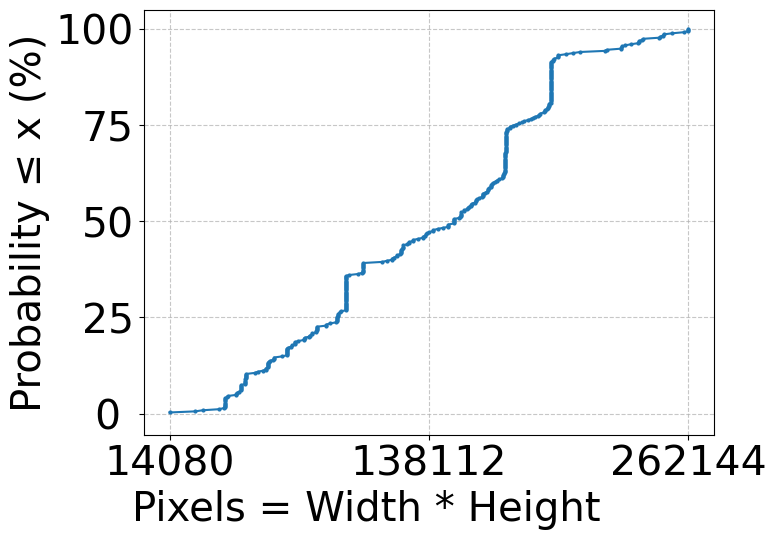

1
/srv/muse-lab/datasets/VLMEvalKitdata/LMUData/images/COCO
95500


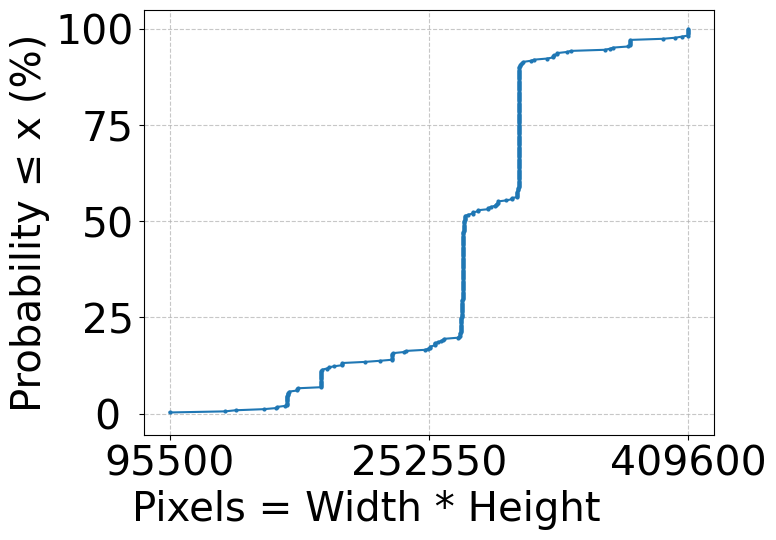

2
/srv/muse-lab/datasets/VLMEvalKitdata/LMUData/images/LLaVABench
216600


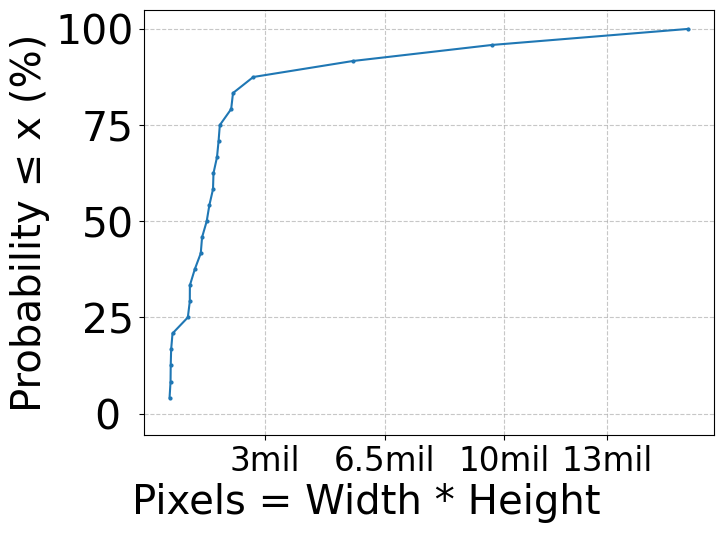

3


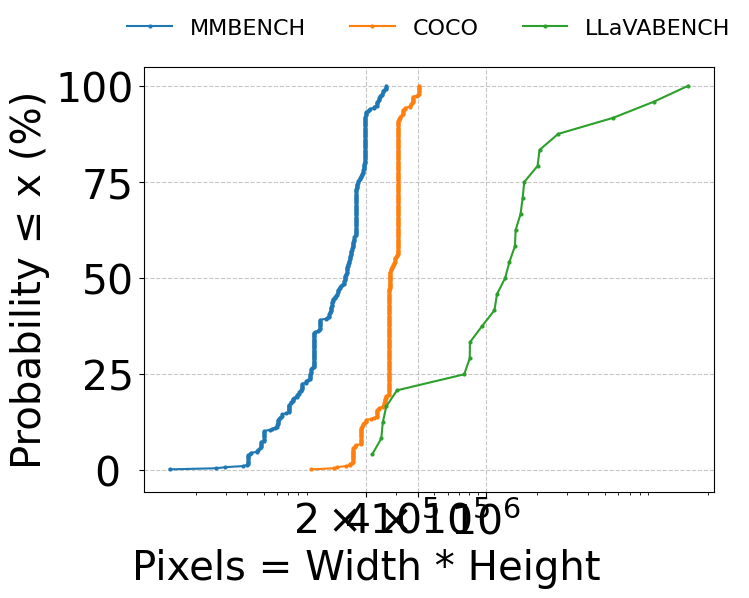

In [27]:
lists_of_values = []
for image_folder in [MMBENCH_images, COCO_VAL_images, LLaVABENCH_images]:
    
    print(image_folder)
    dataset_name=image_folder.split("/")[-1]

    dimensions = []
    for img_pth in os.listdir(image_folder):
        if not img_pth.endswith('.jpg'):
            continue
        img_path = os.path.join(image_folder, img_pth)
        img = Image.open(img_path)
        dimensions.append(img.size)

    num_pixels = [width * height for width, height in dimensions]
    lists_of_values.append(num_pixels)
    if image_folder == LLaVABENCH_images:
        _, fig = plot_simple_cdf(num_pixels, x_ax_tit="Pixels = Width * Height", integer_xticks=True, dataset_name=dataset_name)
    else:
        _, fig = plot_simple_cdf(num_pixels, x_ax_tit="Pixels = Width * Height", dataset_name=dataset_name)
    save_figure_as_pdf(fig, dataset_name + "_CDF")

    # fig = plot_frame_sizes(dimensions, dataset_name=image_folder.split("/")[-1])
    # save_figure_as_pdf(fig, dataset_name + "_sizes")
    # print_top_n_frame_sizes(dimensions, top_n=5)

    print(len(lists_of_values))

_, fig = plot_simple_cdf(lists_of_values, names=["MMBENCH", "COCO", "LLaVABENCH"], x_ax_tit="Pixels = Width * Height", integer_xticks=False, dataset_name="All VLMEvalKit datasets", use_log_scale=True)

### Video Datasets

In [28]:
LMUData_tsv_pths_dict = {
    "Video-MME_64frame": os.path.join(CACHE_MODEL_DIR, "hub/datasets--lmms-lab--Video-MME/" \
                                      "snapshots/ead1408f75b618502df9a1d8e0950166bf0a2a0b/Video-MME.tsv"),
    "TempCompass_Captioning_64frame": os.path.join(CACHE_MODEL_DIR, "hub/datasets--lmms-lab--TempCompass/" \
                                                   "snapshots/c8a67d88a3bc6fd4b2f9ae2f9e112668fbe05722/TempCompass_Captioning.tsv"),
    "MMBench_Video_64frame_nopack": os.path.join(CACHE_MODEL_DIR, "hub/datasets--opencompass--MMBench-Video/snapshots/"\
                                                 "ef35e21df54488715a906c7e47146f5d9f4abbed/MMBench-Video.tsv")
}
pth_to_video_folders_dict = {
    "Video-MME_64frame": os.path.join(CACHE_MODEL_DIR, "hub/datasets--lmms-lab--Video-MME" \
                                      # "/snapshots/ead1408f75b618502df9a1d8e0950166bf0a2a0b/video")
                                      "/snapshots/ead1408f75b618502df9a1d8e0950166bf0a2a0b"),
    "TempCompass_Captioning_64frame": os.path.join(CACHE_MODEL_DIR, "hub/datasets--lmms-lab--TempCompass/" \
                                                   "snapshots/c8a67d88a3bc6fd4b2f9ae2f9e112668fbe05722/videos"),
    "MMBench_Video_64frame_nopack": os.path.join(CACHE_MODEL_DIR, "hub/datasets--opencompass--MMBench-Video/snapshots/"\
                                                #  "ef35e21df54488715a906c7e47146f5d9f4abbed/video")
                                                 "ef35e21df54488715a906c7e47146f5d9f4abbed")
}
column_name_with_video_paths = {
    "Video-MME_64frame": "video_path",
    "TempCompass_Captioning_64frame": "video",
    "MMBench_Video_64frame_nopack": "video_path"
}

Video-MME_64frame
TempCompass_Captioning_64frame
MMBench_Video_64frame_nopack


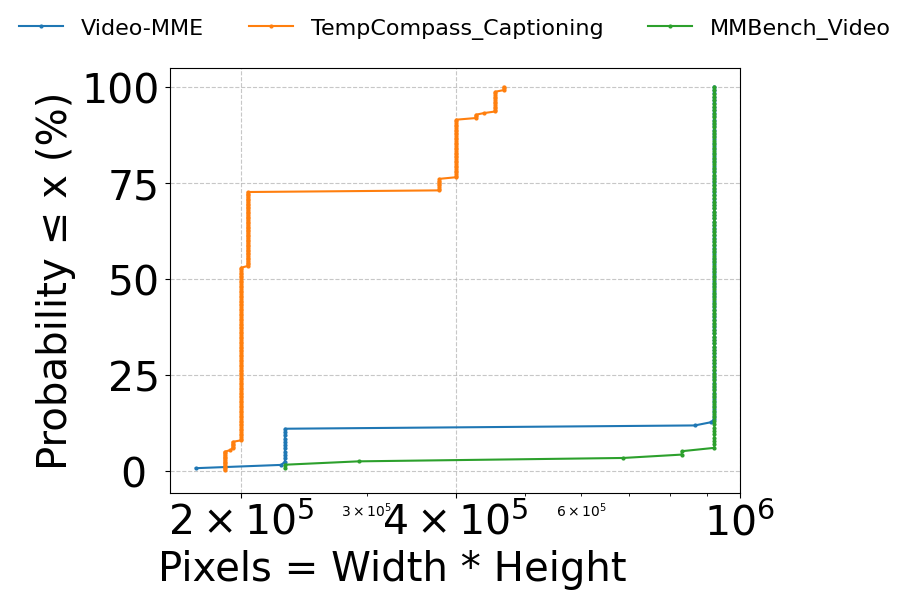

958


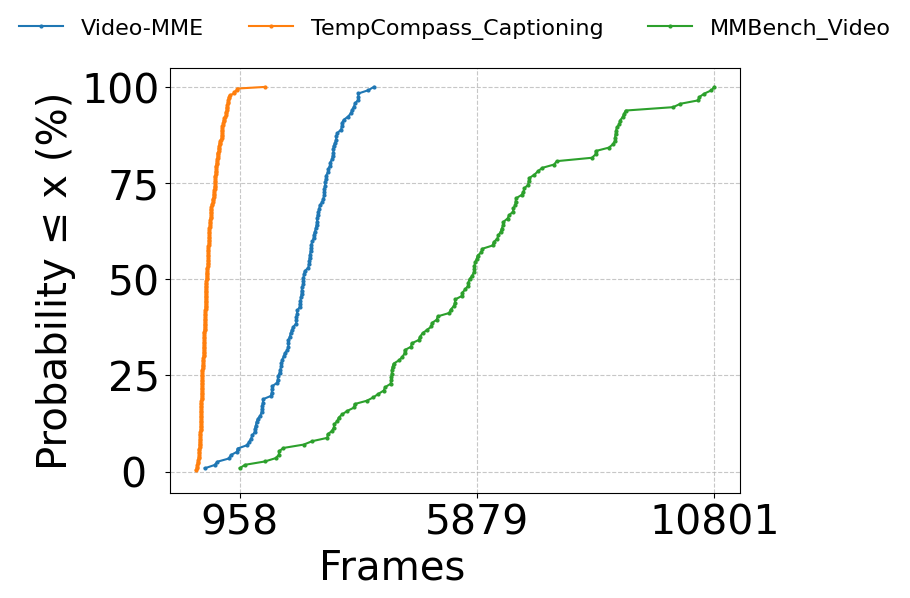

In [29]:
lists_of_widths_heights = []
lists_of_frames = []
for vid_dataset in ["Video-MME_64frame","TempCompass_Captioning_64frame","MMBench_Video_64frame_nopack"]:
    
    print(vid_dataset)
    
    LMUData_tsv_pth = LMUData_tsv_pths_dict[vid_dataset]
    pth_to_video_folder = pth_to_video_folders_dict[vid_dataset]

    data = pd.read_csv(LMUData_tsv_pth, sep = '\t')
    video_path_column = list(data[
        column_name_with_video_paths[vid_dataset]
        ].unique())

    frames = []
    widths_heights = []
    for vid_pth in video_path_column:
        if vid_dataset != "TempCompass_Captioning_64frame":
            total_pth = os.path.join(pth_to_video_folder, vid_pth)
        else:
            total_pth = os.path.join(pth_to_video_folder, vid_pth + ".mp4")
        rets = get_video_metadata(total_pth)
        frames.append(rets[0])
        widths_heights.append((rets[1], rets[2]))
    
    lists_of_frames.append(frames)
    num_pixels = [width * height for width, height in widths_heights]
    lists_of_widths_heights.append(num_pixels)

    # n, fig = plot_simple_cdf(value_list=frames, x_ax_tit="Number Of Frames", dataset_name=vid_dataset.split("_64frame")[0])
    # save_figure_as_pdf(fig, vid_dataset + "_CDF")
    # print(f"Data points: {n}\nMinimum frame value: {np.min(frames)}\nMaximum frame value: {np.max(frames)}")

    # fig = plot_frame_sizes(widths_heights, dataset_name=vid_dataset.split("_64frame")[0])
    # # save_figure_as_pdf(fig, vid_dataset + "_frame_sizes")
    # print_top_n_frame_sizes(widths_heights, top_n=5)

_, fig = plot_simple_cdf(lists_of_widths_heights, names=["Video-MME", "TempCompass_Captioning", "MMBench_Video"], x_ax_tit="Pixels = Width * Height", integer_xticks=False, dataset_name="All VLMEvalKit datasets", use_log_scale=True)
_, fig = plot_simple_cdf(lists_of_frames, names=["Video-MME", "TempCompass_Captioning", "MMBench_Video"], x_ax_tit="Frames", integer_xticks=False, dataset_name="All VLMEvalKit datasets")

## Datasets Examples and Predictions

In [30]:
# # find specific example
# import pandas as pd

# # Load the Excel file
# df = pd.read_excel("/srv/muse-lab/datasets/VLMEvalKitdata/outputs/Qwen2-VL-7B-Instruct/Qwen2-VL-7B-Instruct_COCO_VAL_bdp_lan_rgb_07.xlsx")  # Replace with your actual file name

# print(df['prediction'])

# # Find rows where 'prediction' contains 'potato'
# matches = df[df['prediction'].astype(str).str.contains("The image shows a display of vintage or antique", case=False, na=False)]

# # Print the line numbers (index + 2 to account for header and 0-based index)
# for i in matches.index:
#     print(f"'potato' found in line {i + 2}")


In [31]:
# print(5005)
# # terminate cell
# raise Exception("Intentional failure for testing purposes")
# print(5005)

COCO_VAL
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------



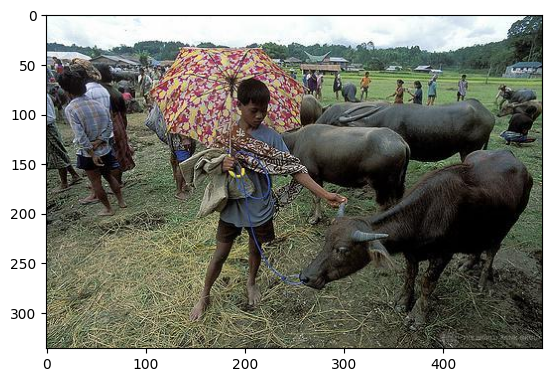

Image KiloBytes: 57.612
Index: 1
Question: Please describe this image in general. Directly provide the description, do not include prefix like "This image depicts". 
Image Path: /srv/muse-lab/datasets/VLMEvalKitdata/LMUData/images/COCO/1.jpg
Caption: ['A child holding a flowered umbrella and petting a yak.', 'A young man holding an umbrella next to a herd of cattle.', 'a young boy barefoot holding an umbrella touching the horn of a cow', 'A young boy with an umbrella who is touching the horn of a cow.', 'A boy holding an umbrella while standing next to livestock.']

Prediction: The image depicts a young boy holding a colorful umbrella standing amidst a group of water buffaloes in an open field. The boy is wearing a patterned shirt and shorts, and he appears to be interacting with the buffaloes. The buffaloes are dark in color and are standing on dry grass. In the background, there are several people, some of whom are also holding umbrellas, and tents or canopies are visible. The sky is

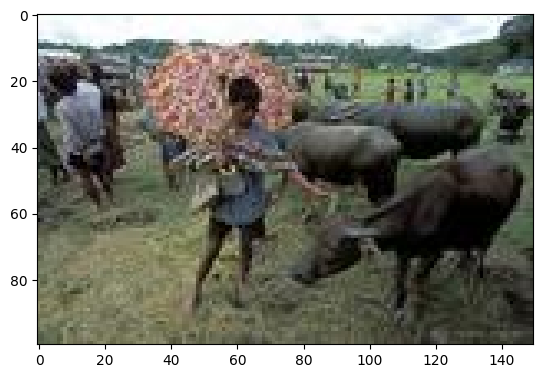

Image KiloBytes: 4.913
Index: 1
Question: Please describe this image in general. Directly provide the description, do not include prefix like "This image depicts". 
Image Path: /srv/muse-lab/datasets/VLMEvalKitdata/LMUData/images/COCO/COCO_VAL_bdp_lan_rgb_07/1.jpg
Caption: ['A child holding a flowered umbrella and petting a yak.', 'A young man holding an umbrella next to a herd of cattle.', 'a young boy barefoot holding an umbrella touching the horn of a cow', 'A young boy with an umbrella who is touching the horn of a cow.', 'A boy holding an umbrella while standing next to livestock.']

Prediction: The image shows a group of people in a rural setting, with several cows grazing in the foreground. The people appear to be engaged in some activity, possibly herding or tending to the cows. The environment looks like a farm or pasture with grass and some buildings in the background.
{'rouge1': np.float64(0.1834862385321101), 'rouge2': np.float64(0.0), 'rougeL': np.float64(0.128440366972477

In [32]:
def scores_and_vis(mod, row, predicted_data, dat, sub, compressed_data_example=None):
    pred_line = predicted_data.loc[row.index - sub]
    # print(pred_line)
    if dat == "LLaVABench":
        print(f"Index: {row.index}\nQuestion: {row.question}\nImage Path: {row.image_path}\nCaption: {row.caption}\
                \ngpt4_ans: {row.gpt4_ans}\ngpt4_score: {pred_line.gpt4_score}\
                \n\nPrediction: {pred_line.prediction}\nScore: {pred_line.score}")
        
        preddata = pred_line.to_frame().T
        ret, renewedcsv = llavabench_fix_bad_reviews(preddata)
        return_scores = renewedcsv["score"] # "gpt4_score"
        return_scores = return_scores.tolist()
        
        ret_score = ret["Relative Score (main)"]
        ret_score_overall = ret_score[ret["split"] == "overall"].item()
        print(f"Realtive Score Overall: {ret_score_overall}")

        for score_current in ["rouge", "bleu", "cider"]:
            print(evaluate_llm_scores(
                    df=pred_line,
                    ref_col="caption",
                    pred_col="prediction",
                    score_type = score_current
                )
            )
    
    elif dat == "COCO_VAL":
        print(f"Index: {row.index}\nQuestion: {pred_line.question}\nImage Path: {whole_img_pth}\nCaption: {row.answer}\n\nPrediction: {pred_line.prediction}")    

        # if compressed_data_example:
        #     json_score_pth = os.path.join(OUTPUTS_FOLDER, mod, mod + "_" + dat + "_bdp_lan_rgb_0" + str(compressed_data_example) + '_score.json')
        # else:
        #     json_score_pth = os.path.join(OUTPUTS_FOLDER, mod, mod + "_" + dat + '_score.json')
        # if os.path.exists(json_score_pth):
        #     universal_json_jsonl_printer(json_score_pth)
        
        for score_current in ["rouge", "bleu", "cider"]:
            print(evaluate_llm_scores(
                    df=pred_line,
                    ref_col="answer",
                    pred_col="prediction",
                    score_type = score_current
                )
            )
        # if pred_line.prediction.startswith("The image shows a bathroom with two toilets placed side by side."):
        #     raise Exception("Intentional failure for testing purposes")

for dat in [
    # "LLaVABench", 
            "COCO_VAL"]:
    print(dat)
    
    LMUData_tsv_pth = os.path.join(LMUData_PATH, dat + '.tsv')
    original_data = pd.read_csv(LMUData_tsv_pth, sep='\t')

    for model_to_check in ["Pixtral-12B"]:
        SUBTRACT = 0
        if dat == "LLaVABench":
            pth = os.path.join(OUTPUTS_FOLDER, model_to_check, model_to_check + "_" + dat + '_openai_result.xlsx')
        elif dat == "COCO_VAL":
            pth = os.path.join(OUTPUTS_FOLDER, model_to_check, model_to_check + "_" + dat + '.xlsx')
            SUBTRACT = 1

        predicted_data = pd.read_excel(pth)

        # random_df = get_random_rows(original_data, 1, random_state=42)
        random_df = get_random_rows(original_data, 1, random_state=random.randint(0, 1000))

        print(100*"-", "\n", 100*"-", "\n", sep='')
        for row in random_df.itertuples():
            pred_line = predicted_data.loc[row.index - SUBTRACT]

            if dat == "LLaVABench":
                whole_img_pth = os.path.join(LLaVABENCH_images, row.image_path)
            elif dat == "COCO_VAL":
                whole_img_pth = os.path.join(COCO_VAL_images, str(row.index) + ".jpg")
            display_matplot_lib_img(whole_img_pth)
            
            scores_and_vis(model_to_check,row, predicted_data, dat, sub=SUBTRACT)
            
            #####################################
            # also get the same example from a compressed dataset
            compressed_data_example = 7
            if dat == "LLaVABench":
                pth_compressed = os.path.join(OUTPUTS_FOLDER, model_to_check, model_to_check + "_" + dat + "_bdp_lan_rgb_0" + str(compressed_data_example) + '_openai_result.xlsx')
                whole_img_pth = os.path.join(LLaVABENCH_images, dat + "_bdp_lan_rgb_0" + str(compressed_data_example), row.image_path)
            elif dat == "COCO_VAL":
                whole_img_pth = os.path.join(COCO_VAL_images, dat + "_bdp_lan_rgb_0" + str(compressed_data_example), str(row.index) + ".jpg")
                pth_compressed = os.path.join(OUTPUTS_FOLDER, model_to_check, model_to_check + "_" + dat + "_bdp_lan_rgb_0" + str(compressed_data_example) + '.xlsx')
            print(pth_compressed)
            display_matplot_lib_img(whole_img_pth)

            predicted_data_compressed = pd.read_excel(pth_compressed)
            
            scores_and_vis(model_to_check,row, predicted_data_compressed, dat, sub=SUBTRACT, compressed_data_example=compressed_data_example)
            print("\n", 100*"-", "\n", 100*"-", "\n", sep='')
    print()

Image KiloBytes: 57.985
index                                                       130
answer        ['A yellow book bus driving down a street.', '...
question      Please describe this image in general. Directl...
prediction    The image shows a yellow and blue bus with the...
Name: 129, dtype: object
Index: 130
Question: Please describe this image in general. Directly provide the description, do not include prefix like "This image depicts". 
Image Path: /srv/muse-lab/datasets/VLMEvalKitdata/LMUData/images/COCO/130.jpg
Caption: ['A yellow book bus driving down a street.', 'The big book bus is blue and yellow', 'A blue and yellow "book bus" is parked on the street.', 'The bus is parked and ready to pick up more people', 'There is a blue and yellow bus stopped with the words, Book Bus, on it.']

Prediction: The image shows a yellow and blue bus with the words "BOOK BUS" written on the front. The bus has a windshield with windshield wipers, and the front displays the brand "ISUZU." The bus is parked inside a building, and there are lights illuminating the area. The bus appears to be designed for transporting books, possibly for a mobile library or bookstore.
{'rouge1': np.float64(0.45217391304347826), 'rouge2': np.float64(0.1592920353982301), 'rougeL': np.float64(0.2956521739130435), 'rougeLsum': np.float64(0.2956521739130435)}
{'score': 4.767936972324089, 'counts': [27, 5, 2, 0], 'totals': [73, 72, 71, 70], 'precisions': [36.986301369863014, 6.944444444444445, 2.816901408450704, 0.7142857142857143], 'bp': 1.0, 'sys_len': 73, 'ref_len': 69}
{'CIDEr': np.float64(0.0), 'CIDEr_per_sample': array([0.])}
/srv/muse-lab/datasets/VLMEvalKitdata/outputs/Pixtral-12B/Pixtral-12B_COCO_VAL_bdp_lan_rgb_07.xlsx

## All results

####################################################################################################
################################### Qwen2-VL-2B-Instruct ###################################
####################################################################################################
MMBench_DEV_EN
Accuracy: 284 / 350 = 81.14%

----------------------------------- COMPRESSED -----------------------------------
Accuracy: 279 / 350 = 79.71%
Accuracy: 275 / 350 = 78.57%
Accuracy: 281 / 350 = 80.29%
Accuracy: 276 / 350 = 78.86%
Accuracy: 267 / 350 = 76.29%
Accuracy: 271 / 350 = 77.43%
Accuracy: 257 / 350 = 73.43%
Accuracy: 251 / 350 = 71.71%
Accuracy: 236 / 350 = 67.43%
Accuracy: 233 / 350 = 66.57%


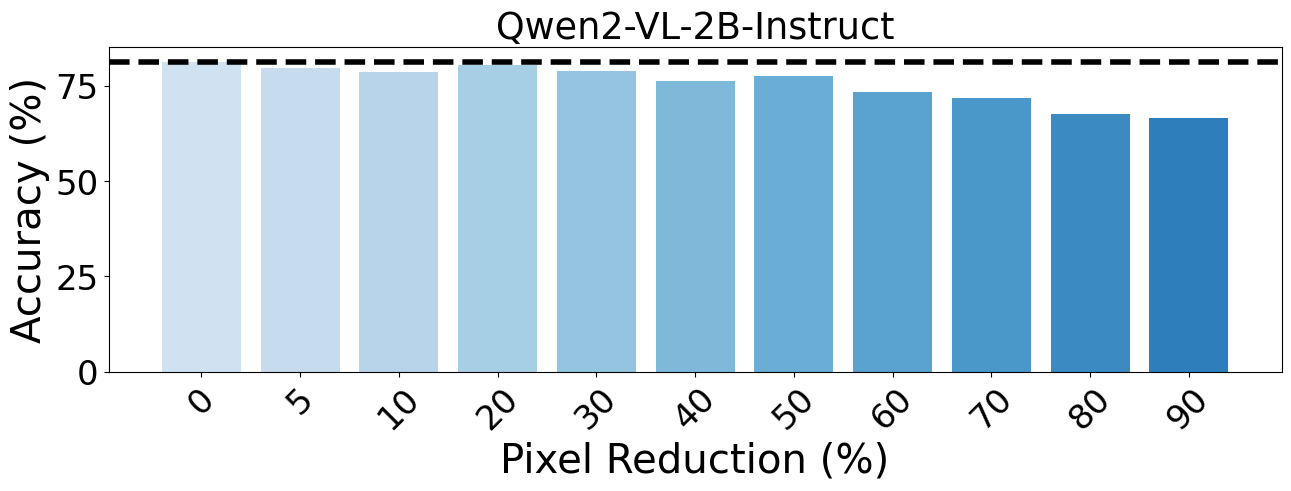

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------


In [33]:
for mod in models:
    print("#" * 100, "\n", "#" * 35, " ",  mod, " ", "#" * 35, "\n", "#" * 100, sep='')
    for dat in datasets:
        print(dat)
        
        if dat == "MMBench_DEV_EN":
            # my_pkl = pd.read_pickle('../outputs/Qwen2-VL-7B-Instruct/Qwen2-VL-7B-Instruct_AOKVQA_original_openai_result.pkl')
            # df = pd.DataFrame.from_dict(my_pkl, orient='index')
            # my_csv = pd.read_csv('../outputs/Qwen2-VL-7B-Instruct/Qwen2-VL-7B-Instruct_AOKVQA_original_acc.csv')
            pth =os.path.join(OUTPUTS_FOLDER, mod, mod + "_" + dat + '.xlsx')
            
            if os.path.exists(pth):
                
                # excel = pd.read_excel(pth)
                # excel['cleaned_prediction'] = excel['prediction'].str.extract(r'\b([A-D])\b', flags=re.IGNORECASE)
                # orig_acc = calculate_accuracy_2_dataframe_columns(excel, answer_col='answer', prediction_col='cleaned_prediction')
                orig_acc = calculate_accuracy_on_MMBench_DEV_EN(pth)

                print()
                compressed_data_scorer(mod, dat, someprints=None, type="MMBench_DEV_EN", orig_acc=orig_acc)
        elif dat == "COCO_VAL":

            json_score_pth = os.path.join(OUTPUTS_FOLDER, mod, mod + "_" + dat + '_score.json')
            if os.path.exists(json_score_pth):
                
                universal_json_jsonl_printer(json_score_pth)
                json_data = read_n_ret_json(json_score_pth)
                # print(json_data["Bleu"])
                # compressed_data_scorer(mod, dat, someprints=["7"], type="COCO")
                compressed_data_scorer(mod, dat, someprints=None, type="COCO")
                coco_visualizer(mod, dat, coco_score=["CIDEr", json_data["CIDEr"]])
                coco_visualizer(mod, dat, coco_score=["ROUGE_L", json_data["ROUGE_L"]])
                coco_visualizer(mod, dat, coco_score=["Bleu_0", json_data["Bleu"][0]])
                coco_visualizer(mod, dat, coco_score=["Bleu_1", json_data["Bleu"][1]])
                coco_visualizer(mod, dat, coco_score=["Bleu_2", json_data["Bleu"][2]])
                coco_visualizer(mod, dat, coco_score=["Bleu_3", json_data["Bleu"][3]])
        elif dat == "LLaVABench":
            pth = os.path.join(OUTPUTS_FOLDER, mod, mod + "_" + dat + '_openai_result.xlsx')
            if os.path.exists(pth):
                
                excel = pd.read_excel(pth)
                # display(excel.tail(3))

                ret, renewedcsv = llavabench_fix_bad_reviews(excel)
                return_scores = renewedcsv["score"] # "gpt4_score"
                return_scores = return_scores.tolist()
                print(ret)
                ret_score = ret["Relative Score (main)"]
                ret_score_overall = ret_score[ret["split"] == "overall"].item()

                score_pth = os.path.join(OUTPUTS_FOLDER, mod, mod + "_" + dat + '_score.csv')
                if os.path.exists(score_pth):
                    csv_f = pd.read_csv(score_pth)
                
                # compressed_data_scorer(mod, dat, someprints=["7"], type="LLaVABench")     
                compressed_data_scorer(mod, dat, someprints=None, type="LLaVABench", orig_acc=ret_score_overall, extra_list=return_scores)
        elif dat == "MMBench_Video_64frame_nopack" and mod in MMBench_Video_64frame_nopack_tmp_folders:
        
            pth = os.path.join(OUTPUTS_FOLDER, mod, MMBench_Video_64frame_nopack_tmp_folders[mod], mod + "_" + dat + '.xlsx')
            if os.path.exists(pth):
                excel = pd.read_excel(pth)
                # display(excel.head(1))

                # To compute and display Other Metrics for LLaVABench
                ret_orig_llavabench = []
                # for score_current in ["rouge", "bleu", "cider"]:
                for score_current in ["rouge"]:
                    ret_orig_llavabench.append(
                        evaluate_llm_scores(
                            df=excel,
                            ref_col="answer",
                            pred_col="prediction",
                            score_type = score_current
                        )
                    )
                for i in ret_orig_llavabench:
                    print(i)
                    break

                llavabench_static_metrics = []
                
                for idx, technique in enumerate(techniques_list):
                    print(technique)
                    for max_frames in max_frames_list:
                        for sampling_params in sampling_params_list[idx]:
                            pth_inner = None
                            if technique == "scene_change" and mod in MMBench_Video_64frame_nopack_tmp_folders_scene_change:
                                pth_inner = os.path.join(OUTPUTS_FOLDER, mod, MMBench_Video_64frame_nopack_tmp_folders_scene_change[mod], mod + "_" + dat + "_scene_change_" + str(max_frames) + '_' + str(sampling_params) + '.xlsx')
                            elif technique == "sharpness" and mod in MMBench_Video_64frame_nopack_tmp_folders_sharpness:
                                pth_inner = os.path.join(OUTPUTS_FOLDER, mod, MMBench_Video_64frame_nopack_tmp_folders_sharpness[mod], mod + "_" + dat + "_sharpness_" + str(max_frames) + '_' + str(sampling_params) + '.xlsx')
                            elif technique == "motion_based" and mod in MMBench_Video_64frame_nopack_tmp_folders_motion_based:
                                pth_inner = os.path.join(OUTPUTS_FOLDER, mod, MMBench_Video_64frame_nopack_tmp_folders_motion_based[mod], mod + "_" + dat + "_motion_based_" + str(max_frames) + '_' + str(sampling_params) + '.xlsx')
                            if pth_inner:
                                if os.path.exists(pth_inner):
                                    print(f"Frame: {max_frames}, Sampling: {sampling_params}")
                                    excel = pd.read_excel(pth_inner)
                                    display(excel.head(1))
                                    
                                    list_scores = []
                                    # for score_current in ["rouge", "bleu", "cider"]:
                                    for score_current in ["rouge"]:
                                        list_scores.append(
                                            evaluate_llm_scores(
                                                df=excel,
                                                ref_col="answer",
                                                pred_col="prediction",
                                                score_type = score_current
                                            )
                                        )
                                    llavabench_static_metrics.append(list_scores)
                                    
                                    print()
                
                if len(ret_orig_llavabench):
                    for metric_idx, metric_nam, tit_score in [
                        # [0, "rouge1", " - Overlap of unigrams"],
                        # [0, "rouge2", " - Overlap of bigrams"],
                        [0, "rougeL", " - Longest Common Subsequence (LCS)"],
                        # [0, "rougeLsum", " - sentence-level LCS"],
                        # [1, "score", " - BLEU score"],
                        # [2, "CIDEr", " - score"],
                    ]:
                        scores_static = [ret_orig_llavabench[metric_idx][metric_nam]]
                        print(scores_static)
                        
                        for compressed_scores in llavabench_static_metrics:
                            scores_static.append(compressed_scores[metric_idx][metric_nam])
                        
                        _ = acc_pixel_red(
                            # scores_static[1:], scores_static[0], round_up="int", title=mod, y_axis=metric_nam + tit_score, x_ziper=["U", "SC", "SH", "MB"],)
                            scores_static[1:], scores_static[0], round_up=False, title=mod, y_axis=metric_nam + tit_score, x_ziper=["U", "SC", "SH", "MB"],)

        elif dat == "Video-MME_64frame":
            pth =os.path.join(OUTPUTS_FOLDER, mod, mod + "_" + dat + '.xlsx')
            if os.path.exists(pth):
                excel = pd.read_excel(pth)
                excel['cleaned_prediction'] = excel['prediction'].str.extract(r'\b([A-D])\b', flags=re.IGNORECASE)
                print(f"Unique answers {excel['cleaned_prediction'].unique()}")

                orig_acc = calculate_accuracy_2_dataframe_columns(excel, answer_col='answer', prediction_col='cleaned_prediction')
                accs = []
                print()

                for idx, technique in enumerate(techniques_list):
                    print(technique)
                    for max_frames in max_frames_list:
                        for sampling_params in sampling_params_list[idx]:
                            json_f = os.path.join(OUTPUTS_FOLDER, mod, mod + "_" + dat + '_' + technique + "_" + str(max_frames) + '_' + str(sampling_params) + '_score.xlsx')
                            if os.path.exists(json_f):
                                print(f"Frame: {max_frames}, Sampling: {sampling_params}")
                                excel = pd.read_excel(json_f)
                                excel['cleaned_prediction'] = excel['prediction'].str.extract(r'\b([A-D])\b', flags=re.IGNORECASE)
                                print(f"Unique answers {excel['cleaned_prediction'].unique()}")
                                add_acc = calculate_accuracy_2_dataframe_columns(excel, answer_col='answer', prediction_col='cleaned_prediction')
                                accs.append(add_acc)
                                print()
                fig = acc_pixel_red(accs, orig_acc, y_axis="Accuracy (%)", round_up="int", title=mod, x_ziper=["U", "SC", "SH", "MB"], x_label_tit="Sampling Technique")
                save_figure_as_pdf(fig, mod + "_" + dat + "_accs")
        elif dat == "TempCompass_Captioning_64frame" and mod in TempCompass_Captioning_64frame_tmp_folders:
            pth = os.path.join(OUTPUTS_FOLDER, mod, TempCompass_Captioning_64frame_tmp_folders[mod], mod + "_" + dat + '.xlsx')
            if os.path.exists(pth):
                excel = pd.read_excel(pth)
                display(excel.head(1))

                # To compute and display Other Metrics for LLaVABench
                ret_orig_llavabench = []
                # for score_current in ["rouge", "bleu", "cider"]:
                for score_current in ["rouge"]:
                    ret_orig_llavabench.append(
                        evaluate_llm_scores(
                            df=excel,
                            ref_col="answer",
                            pred_col="prediction",
                            score_type = score_current
                        )
                    )
                for i in ret_orig_llavabench:
                    print(i)
                    break

                llavabench_static_metrics = []

                for idx, technique in enumerate(techniques_list):
                    print(technique)
                    for max_frames in max_frames_list:
                        for sampling_params in sampling_params_list[idx]:
                            pth_inner = None
                            if technique == "scene_change" and mod in TempCompass_Captioning_64frame_tmp_folders_scene_change:
                                pth_inner = os.path.join(OUTPUTS_FOLDER, mod, TempCompass_Captioning_64frame_tmp_folders_scene_change[mod], mod + "_" + dat + "_scene_change_" + str(max_frames) + '_' + str(sampling_params) + '.xlsx')
                            elif technique == "sharpness" and mod in TempCompass_Captioning_64frame_tmp_folders_sharpness:
                                pth_inner = os.path.join(OUTPUTS_FOLDER, mod, TempCompass_Captioning_64frame_tmp_folders_sharpness[mod], mod + "_" + dat + "_sharpness_" + str(max_frames) + '_' + str(sampling_params) + '.xlsx')
                            elif technique == "motion_based" and mod in TempCompass_Captioning_64frame_tmp_folders_motion_based:
                                pth_inner = os.path.join(OUTPUTS_FOLDER, mod, TempCompass_Captioning_64frame_tmp_folders_motion_based[mod], mod + "_" + dat + "_motion_based_" + str(max_frames) + '_' + str(sampling_params) + '.xlsx')
                            if pth_inner:
                                if os.path.exists(pth_inner):
                                    print(f"Frame: {max_frames}, Sampling: {sampling_params}")
                                    excel = pd.read_excel(pth_inner)
                                    # display(excel.head(1))
                                    
                                    list_scores = []
                                    # for score_current in ["rouge", "bleu", "cider"]:
                                    for score_current in ["rouge"]:
                                        list_scores.append(
                                            evaluate_llm_scores(
                                                df=excel,
                                                ref_col="answer",
                                                pred_col="prediction",
                                                score_type = score_current
                                            )
                                        )
                                    llavabench_static_metrics.append(list_scores)
                                    
                                    print()
                if len(ret_orig_llavabench):
                    for metric_idx, metric_nam, tit_score in [
                        # [0, "rouge1", " - Overlap of unigrams"],
                        # [0, "rouge2", " - Overlap of bigrams"],
                        [0, "rougeL", " - Longest Common Subsequence (LCS)"],
                        # [0, "rougeLsum", " - sentence-level LCS"],
                        # [1, "score", " - BLEU score"],
                        # [2, "CIDEr", " - score"],
                    ]:
                        scores_static = [ret_orig_llavabench[metric_idx][metric_nam]]
                        print(scores_static)
                        
                        for compressed_scores in llavabench_static_metrics:
                            scores_static.append(compressed_scores[metric_idx][metric_nam])
                        
                        _ = acc_pixel_red(
                            # scores_static[1:], scores_static[0], round_up="int", title=mod, y_axis=metric_nam + tit_score, x_ziper=["U", "SC", "SH", "MB"],)
                            scores_static[1:], scores_static[0], round_up=False, title=mod, y_axis=metric_nam + tit_score, x_ziper=["U", "SC", "SH", "MB"],)
        
        print("-" * 100, "\n", "-" * 100, sep='')

## Results Combined

####################################################################################################
################################### MMBench_DEV_EN ###################################
####################################################################################################
Qwen2-VL-2B-Instruct
Accuracy: 284 / 350 = 81.14%
----------------------------------- COMPRESSED -----------------------------------
Accuracy: 279 / 350 = 79.71%
Accuracy: 275 / 350 = 78.57%


Accuracy: 281 / 350 = 80.29%
Accuracy: 276 / 350 = 78.86%
Accuracy: 267 / 350 = 76.29%
Accuracy: 271 / 350 = 77.43%
Accuracy: 257 / 350 = 73.43%
Accuracy: 251 / 350 = 71.71%
Accuracy: 236 / 350 = 67.43%
Accuracy: 233 / 350 = 66.57%
[np.float64(0.7971428571428572), np.float64(0.7857142857142857), np.float64(0.8028571428571428), np.float64(0.7885714285714286), np.float64(0.7628571428571429), np.float64(0.7742857142857142), np.float64(0.7342857142857143), np.float64(0.7171428571428572), np.float64(0.6742857142857143), np.float64(0.6657142857142857)]
11
Qwen2-VL-7B-Instruct
Accuracy: 300 / 350 = 85.71%
----------------------------------- COMPRESSED -----------------------------------
Accuracy: 296 / 350 = 84.57%
Accuracy: 298 / 350 = 85.14%
Accuracy: 296 / 350 = 84.57%
Accuracy: 297 / 350 = 84.86%
Accuracy: 296 / 350 = 84.57%
Accuracy: 293 / 350 = 83.71%
Accuracy: 289 / 350 = 82.57%
Accuracy: 278 / 350 = 79.43%
Accuracy: 268 / 350 = 76.57%
Accuracy: 249 / 350 = 71.14%
[np.float64(0.8457142

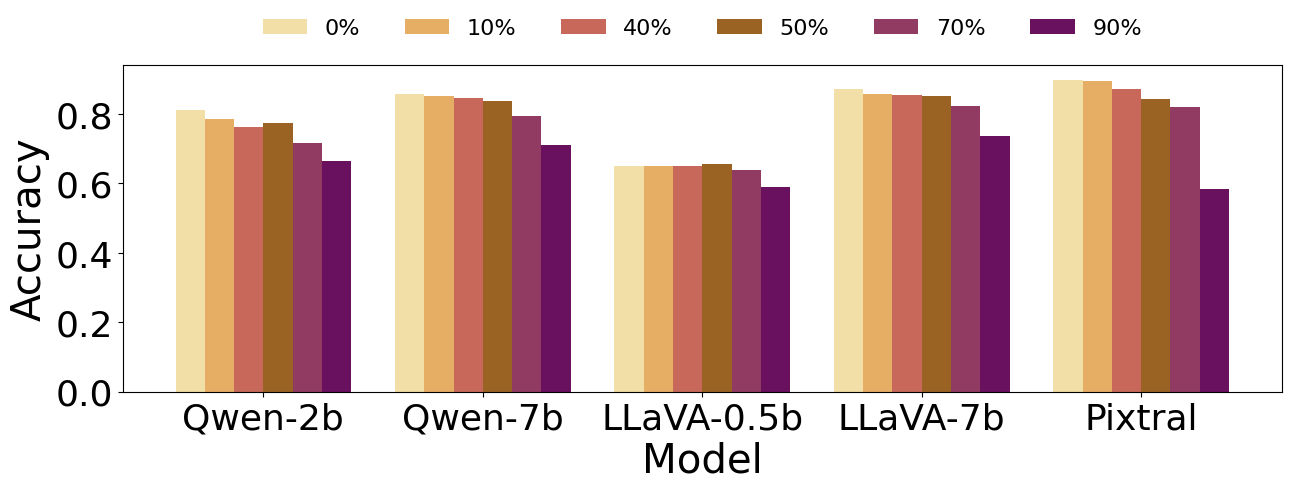

####################################################################################################
################################### COCO_VAL ###################################
####################################################################################################
Qwen2-VL-2B-Instruct
11
[16.44689811344106, 16.502292857735583, 16.776016153237865, 16.0804660256344, 16.317937764683656, 16.55752533694358, 16.142551778610407, 16.151305610310654, 16.331280843236218, 15.565615160479041, 13.743076423392452]
Qwen2-VL-7B-Instruct
11
[14.90186372247897, 15.014534930183574, 14.979958294512507, 15.222777863983335, 15.174435240400728, 15.218027196944467, 15.298651960965978, 15.973129066857231, 16.153432185919833, 15.919477465704887, 14.901876968968864]
llava_onevision_qwen2_0.5b_ov
11
[11.591589397530441, 11.71686148518766, 11.907334705966823, 11.799554614084649, 11.966918569230026, 11.717596212180766, 11.948572263836203, 11.939687973027096, 12.055340565636447, 13.049050278675894,

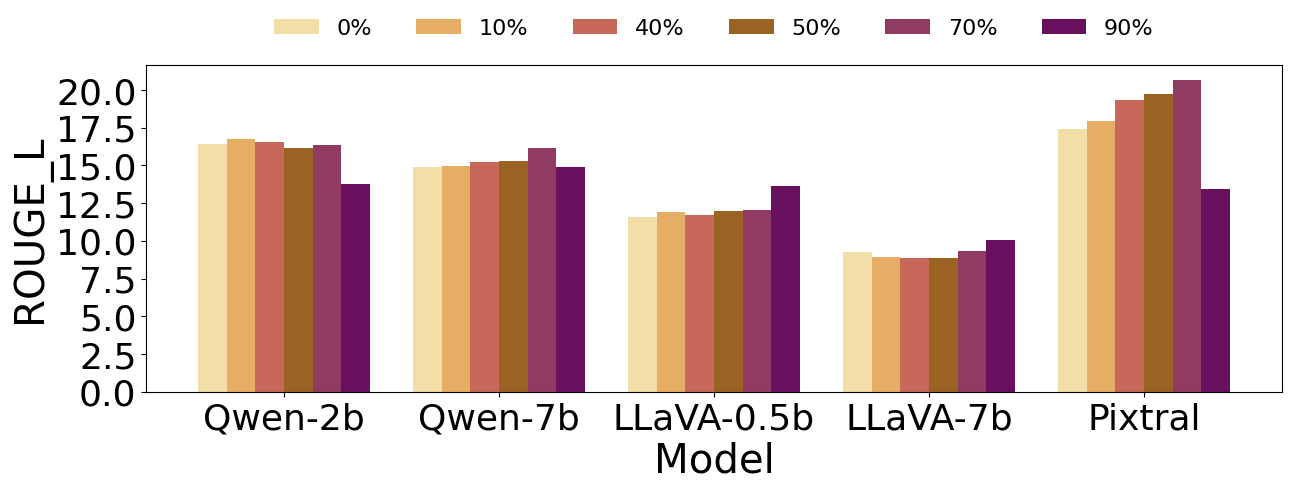

####################################################################################################
################################### LLaVABench ###################################
####################################################################################################
Qwen2-VL-2B-Instruct
Before NUMS [np.float64(0.10319245524807827)]
Qwen2-VL-7B-Instruct
Before NUMS [np.float64(0.14490609234156743)]
llava_onevision_qwen2_0.5b_ov
Before NUMS [np.float64(0.14738389455652295)]
llava_onevision_qwen2_7b_ov
Before NUMS [np.float64(0.14685489000508506)]
Pixtral-12B
Before NUMS [np.float64(0.1546131054506619)]
len(dataset_accuracies) 5


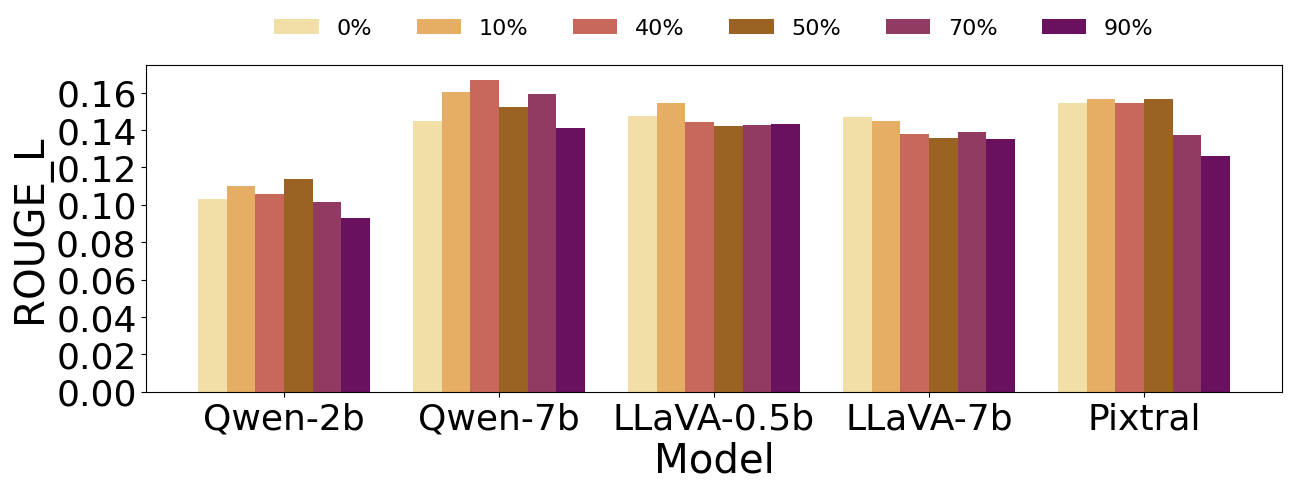

In [34]:
coco_stat_use = "ROUGE_L"
# CIDEr
# Bleu_0
# Bleu_1
# Bleu_2
# Bleu_3

percentages=[0, 2, 5, 6, 8, 10]
nums_inner = ["1", "4", "5", "7", "9"]
num_perc = len(percentages)
idx_to_reduction = {
    0: "0",
    1: "5",
    2: "10",
    3: "20",
    4: "30",
    5: "40",
    6: "50",
    7: "60",
    8: "70",
    9: "80",
    10: "90"
}
def map_model_alias_to_name(model_alias):
    dic_ret = {
        "Qwen2-VL-2B-Instruct": "Qwen-2b",
        "Qwen2-VL-7B-Instruct": "Qwen-7b",
        "llava_onevision_qwen2_0.5b_ov": "LLaVA-0.5b",
        "llava_onevision_qwen2_7b_ov": "LLaVA-7b",
        "Pixtral-12B": "Pixtral"
    }
    return dic_ret[model_alias]
colors_all = ["#F2DFA8", "#E6AE65", "#C8685B", "#9a6324", "#923B62", "#69105E", "#1E256C", "#0E0721"]
models_together = [
    "Qwen2-VL-2B-Instruct",
    "Qwen2-VL-7B-Instruct",
    "llava_onevision_qwen2_0.5b_ov",
    "llava_onevision_qwen2_7b_ov",
    "Pixtral-12B",
]
datasets_together = [
    "MMBench_DEV_EN",
    "COCO_VAL",
    "LLaVABench",
]
num_models = len(models_together)
llava_bench_metric_chosen = "rougeL"
llava_bench_metric_idx = 0

for dat in datasets_together:
    print("#" * 100, "\n", "#" * 35, " ",  dat, " ", "#" * 35, "\n", "#" * 100, sep='')

    dataset_accuracies = []
    metric_name_use = "Accuracy"

    for mod in models_together:
        print(mod)
        ret_orig_llavabench = []
        if dat == "MMBench_DEV_EN":
            pth =os.path.join(OUTPUTS_FOLDER, mod, mod + "_" + dat + '.xlsx')
            
            if os.path.exists(pth):
                orig_acc = calculate_accuracy_on_MMBench_DEV_EN(pth)
                accs = compressed_data_scorer(mod, dat, someprints=None, type="MMBench_DEV_EN", orig_acc=orig_acc, only_return_accs=True)
                print(accs)
                accs.insert(0, orig_acc)
                print(len(accs))
                dataset_accuracies.append(accs)
        elif dat == "LLaVABench":
            pth = os.path.join(OUTPUTS_FOLDER, mod, mod + "_" + dat + '_openai_result.xlsx')
            # print(pth)
            if os.path.exists(pth):
                
                excel = pd.read_excel(pth)
                metric_name_use = "ROUGE_L"

                ret, renewedcsv = llavabench_fix_bad_reviews(excel)
                return_scores = renewedcsv["score"] # "gpt4_score"
                return_scores = return_scores.tolist()

                score_pth = os.path.join(OUTPUTS_FOLDER, mod, mod + "_" + dat + '_score.csv')
                if os.path.exists(score_pth):
                    csv_f = pd.read_csv(score_pth)

                    # To compute and display Other Metrics for LLaVABench
                    for score_current in ["rouge", "bleu", "cider"]:
                        ret_orig_llavabench.append(
                            evaluate_llm_scores(
                                df=renewedcsv,
                                ref_col="caption",
                                pred_col="prediction",
                                score_type = score_current
                            )
                        )
                    # for i in ret_orig_llavabench:
                    #     print(i)
                    # SOS
                    accs = [ret_orig_llavabench[llava_bench_metric_idx][llava_bench_metric_chosen]]
                    print("Before NUMS", accs)
                    
                    for num in NUMS:
                        pth_inner_llava = os.path.join(OUTPUTS_FOLDER, mod, mod + "_" + dat + '_bdp_lan_rgb_0' + num + '_score.csv')
                        if os.path.exists(pth_inner_llava):
                            pth_excel_inner_llava = os.path.join(OUTPUTS_FOLDER, mod, mod + "_" + dat + '_bdp_lan_rgb_0' + num + '_openai_result.xlsx')
                            excel_reviews = pd.read_excel(pth_excel_inner_llava)
                            renewed_scores, renewed_excel_csv = llavabench_fix_bad_reviews(excel_reviews)
                            list_scores = []
                            for score_current in ["rouge", "bleu", "cider"]:
                                list_scores.append(
                                    evaluate_llm_scores(
                                        df=renewed_excel_csv,
                                        ref_col="caption",
                                        pred_col="prediction",
                                        score_type = score_current
                                    )
                                )
                            # SOS
                            accs.append(list_scores[llava_bench_metric_idx][llava_bench_metric_chosen])
                            # print(accs)
                    # print(len(llavabench_static_metrics))
                    dataset_accuracies.append(accs)
        elif dat == "COCO_VAL":

            json_score_pth = os.path.join(OUTPUTS_FOLDER, mod, mod + "_" + dat + '_score.json')
            if os.path.exists(json_score_pth):
                
                # universal_json_jsonl_printer(json_score_pth)
                json_data = read_n_ret_json(json_score_pth)

                coco_score=[coco_stat_use, json_data[coco_stat_use]]
                score_name = coco_score[0]
                metric_name_use = score_name
                orig_acc = coco_score[1]
                accs = [orig_acc]

                # for num in nums_inner:
                for num in NUMS:
                    pth_in_coc = os.path.join(OUTPUTS_FOLDER, mod, mod + "_" + dat + '_bdp_lan_rgb_0' + num + '_score.json')
                    if os.path.exists(pth_in_coc):
                        # universal_json_jsonl_printer(pth)
                        json_data = read_n_ret_json(pth_in_coc)
                        if not score_name.startswith("Bleu"):
                            score_compr = json_data[score_name]
                        else:
                            blue_num = int(score_name.split("_")[-1])
                            score_compr = json_data["Bleu"][blue_num]
                        accs.append(score_compr)
                print(len(accs))
                print(accs)
            dataset_accuracies.append(accs)
    
    print("len(dataset_accuracies)", len(dataset_accuracies))
    
    fig, ax = plt.subplots(figsize=[param_dictionary["figsize_mul"]*6.4, 4.8], constrained_layout=True)
    bar_width = 0.8 / max(1, num_perc)
    x = np.arange(num_models)
    
    for j, model in enumerate(models_together):
        for i, p in enumerate(percentages):
            # vals = model_metrics[model].get(p, [])
            # print(f"model: {model}, p: {p}")
            vals = dataset_accuracies[j][p]
            # print(vals)
            # convert to numpy and drop NaNs
            arr = np.array(vals, dtype=float) # if len(vals) > 0 else np.array([], dtype=float)
            arr = arr[~np.isnan(arr)]

            height = float(np.mean(arr))   # or np.median(arr) if you prefer
            xpos = x[j] + i * bar_width

            ax.bar(
                xpos,
                height,
                bar_width,
                label=f"{idx_to_reduction[p]}%" if j == 0 else None,  # label each percentage only once
                color=colors_all[i])
            # ax.text( # optional annotation
            #     xpos,
            #     height + 0.01 * (ax.get_ylim()[1] - ax.get_ylim()[0] if ax.get_ylim()[1] > 0 else 1),
            #     f"{height:.2f}",
            #     ha="center",
            #     va="bottom",
            #     fontsize=8)

    ax.set_xticks(x + bar_width * (num_perc - 1) / 2.0)
    ax.set_xticklabels([map_model_alias_to_name(model) for model in models_together], fontsize=12)
    ax.tick_params(axis="x", labelsize=param_dictionary["x_params_label_size"])
    plt.yticks(fontsize=param_dictionary["y_params_label_size"])
    ax.set_xlabel("Model", size=param_dictionary["xlabel_size"])
    ax.set_ylabel(metric_name_use, size=param_dictionary["ylabel_size"])
    ax.legend(
            loc='lower center',
            bbox_to_anchor=(0.5, 1.02),  # x=0.5 centers it, y=1.02 places it just above the plot
            bbox_transform=ax.transAxes,
            ncol=6,                      # number of columns if you have multiple legend items
            fontsize=16,
            frameon=False                # optional: removes the legend box
        )
    
    plt.show()

####################################################################################################
################################### Video-MME_64frame ###################################
####################################################################################################
Qwen2-VL-2B-Instruct
Unique answers ['A' 'C' 'D' 'B']
Accuracy: 216 / 350 = 61.71%
0.6171428571428571
scene_change


Accuracy: 211 / 350 = 60.29%

Qwen2-VL-7B-Instruct
Unique answers ['B' 'A' 'D' 'C']
Accuracy: 247 / 350 = 70.57%
0.7057142857142857
scene_change
Accuracy: 227 / 350 = 64.86%

llava_onevision_qwen2_0.5b_ov
Unique answers ['A' 'D' 'B' 'C']
Accuracy: 175 / 350 = 50.00%
0.5
scene_change
Accuracy: 168 / 350 = 48.00%

llava_onevision_qwen2_7b_ov
Unique answers ['C' 'A' 'D' 'B']
Accuracy: 248 / 350 = 70.86%
0.7085714285714285
scene_change
Accuracy: 230 / 350 = 65.71%

Pixtral-12B
Unique answers ['A' 'B' 'C' 'D']
Accuracy: 246 / 350 = 70.29%
0.7028571428571428
scene_change
Accuracy: 224 / 350 = 64.00%

len(dataset_accuracies) 5
len(dataset_accuracies[0]) 2


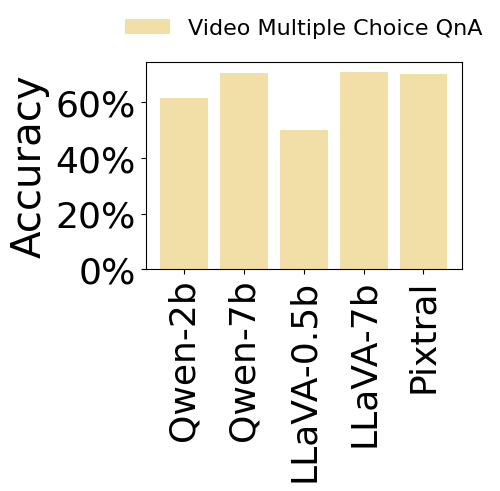

In [35]:
from matplotlib.ticker import PercentFormatter
techniques_list = [
    'scene_change',
                #    'sharpness',
                #    'motion_based'
                   ]

datasets_together = [
    "Video-MME_64frame",
    # "MMBench_Video_64frame_nopack",
    # "TempCompass_Captioning_64frame"
]

llava_bench_metric_chosen = "rougeL"
llava_bench_metric_idx = 0

for dat in datasets_together:
    print("#" * 100, "\n", "#" * 35, " ",  dat, " ", "#" * 35, "\n", "#" * 100, sep='')

    dataset_accuracies = []
    metric_name_use = "Accuracy"

    for mod in models_together:
        print(mod)
        ret_orig_llavabench = []
        if dat == "Video-MME_64frame":

            pth =os.path.join(OUTPUTS_FOLDER, mod, mod + "_" + dat + '.xlsx')
            
            if os.path.exists(pth):

                excel = pd.read_excel(pth)
                excel['cleaned_prediction'] = excel['prediction'].str.extract(r'\b([A-D])\b', flags=re.IGNORECASE)
                print(f"Unique answers {excel['cleaned_prediction'].unique()}")

                orig_acc = calculate_accuracy_2_dataframe_columns(excel, answer_col='answer', prediction_col='cleaned_prediction')
                print(orig_acc)
                accs = [orig_acc]
                
                for idx, technique in enumerate(techniques_list):
                    print(technique)
                    # we only have one max frame
                    for max_frames in max_frames_list:
                        for sampling_params in sampling_params_list[idx]:
                            json_f = os.path.join(OUTPUTS_FOLDER, mod, mod + "_" + dat + '_' + technique + "_" + str(max_frames) + '_' + str(sampling_params) + '_score.xlsx')
                            if os.path.exists(json_f):
                                # print(f"Frame: {max_frames}, Sampling: {sampling_params}")
                                excel = pd.read_excel(json_f)
                                excel['cleaned_prediction'] = excel['prediction'].str.extract(r'\b([A-D])\b', flags=re.IGNORECASE)
                                
                                # print(f"Unique answers {excel['cleaned_prediction'].unique()}")
                                
                                add_acc = calculate_accuracy_2_dataframe_columns(excel, answer_col='answer', prediction_col='cleaned_prediction')
                                accs.append(add_acc)
                                print()
                    # print(len(accs))
                dataset_accuracies.append(accs) # dataset_accuracies
                
        elif dat == "MMBench_Video_64frame_nopack" and mod in MMBench_Video_64frame_nopack_tmp_folders:

            pth = os.path.join(OUTPUTS_FOLDER, mod, MMBench_Video_64frame_nopack_tmp_folders[mod], mod + "_" + dat + '.xlsx')

            if os.path.exists(pth):
                excel = pd.read_excel(pth)
                metric_name_use = "ROUGE_L"
                # display(excel.head(1))

                for score_current in ["rouge", "bleu", "cider"]:
                    ret_orig_llavabench.append(
                        evaluate_llm_scores(
                            # df=renewedcsv,
                            df=excel,
                            # ref_col="caption",
                            ref_col="answer",
                            pred_col="prediction",
                            score_type = score_current
                        )
                    )
                for i in ret_orig_llavabench:
                    print(i)
                    break
                
                # SOS
                accs = [ret_orig_llavabench[llava_bench_metric_idx][llava_bench_metric_chosen]]
                print("Before NUMS", accs)

                for idx, technique in enumerate(techniques_list):
                    print(technique)
                    for max_frames in max_frames_list:
                        for sampling_params in sampling_params_list[idx]:
                            pth_inner = None
                            if technique == "scene_change" and mod in MMBench_Video_64frame_nopack_tmp_folders_scene_change:
                                pth_inner = os.path.join(OUTPUTS_FOLDER, mod, MMBench_Video_64frame_nopack_tmp_folders_scene_change[mod], mod + "_" + dat + "_scene_change_" + str(max_frames) + '_' + str(sampling_params) + '.xlsx')
                            elif technique == "sharpness" and mod in MMBench_Video_64frame_nopack_tmp_folders_sharpness:
                                pth_inner = os.path.join(OUTPUTS_FOLDER, mod, MMBench_Video_64frame_nopack_tmp_folders_sharpness[mod], mod + "_" + dat + "_sharpness_" + str(max_frames) + '_' + str(sampling_params) + '.xlsx')
                            elif technique == "motion_based" and mod in MMBench_Video_64frame_nopack_tmp_folders_motion_based:
                                pth_inner = os.path.join(OUTPUTS_FOLDER, mod, MMBench_Video_64frame_nopack_tmp_folders_motion_based[mod], mod + "_" + dat + "_motion_based_" + str(max_frames) + '_' + str(sampling_params) + '.xlsx')
                            if pth_inner:
                                if os.path.exists(pth_inner):
                                    print(f"Frame: {max_frames}, Sampling: {sampling_params}")
                                    excel = pd.read_excel(pth_inner)
                                    # display(excel.head(1))
                                    
                                    list_scores = []
                                    for score_current in ["rouge", "bleu", "cider"]:
                                        list_scores.append(
                                            evaluate_llm_scores(
                                                df=excel,
                                                ref_col="answer",
                                                pred_col="prediction",
                                                score_type = score_current
                                            )
                                        )
                                    # llavabench_static_metrics.append(list_scores)
                                    accs.append(list_scores[llava_bench_metric_idx][llava_bench_metric_chosen])
                print("accs len", len(accs))
                dataset_accuracies.append(accs)
                                    
        # elif dat == "COCO_VAL":
        elif dat == "TempCompass_Captioning_64frame" and mod in TempCompass_Captioning_64frame_tmp_folders:
            pth = os.path.join(OUTPUTS_FOLDER, mod, TempCompass_Captioning_64frame_tmp_folders[mod], mod + "_" + dat + '.xlsx')

            if os.path.exists(pth):
                excel = pd.read_excel(pth)
                metric_name_use = "ROUGE_L"
                # display(excel.head(1))

                for score_current in ["rouge", "bleu", "cider"]:
                    ret_orig_llavabench.append(
                        evaluate_llm_scores(
                            # df=renewedcsv,
                            df=excel,
                            # ref_col="caption",
                            ref_col="answer",
                            pred_col="prediction",
                            score_type = score_current
                        )
                    )
                for i in ret_orig_llavabench:
                    print(i)
                    break
                
                # SOS
                accs = [ret_orig_llavabench[llava_bench_metric_idx][llava_bench_metric_chosen]]
                print("Before NUMS", accs)

                for idx, technique in enumerate(techniques_list):
                    print(technique)
                    for max_frames in max_frames_list:
                        for sampling_params in sampling_params_list[idx]:
                            pth_inner = None
                            if technique == "scene_change" and mod in TempCompass_Captioning_64frame_tmp_folders_scene_change:
                                pth_inner = os.path.join(OUTPUTS_FOLDER, mod, TempCompass_Captioning_64frame_tmp_folders_scene_change[mod], mod + "_" + dat + "_scene_change_" + str(max_frames) + '_' + str(sampling_params) + '.xlsx')
                            elif technique == "sharpness" and mod in TempCompass_Captioning_64frame_tmp_folders_sharpness:
                                pth_inner = os.path.join(OUTPUTS_FOLDER, mod, TempCompass_Captioning_64frame_tmp_folders_sharpness[mod], mod + "_" + dat + "_sharpness_" + str(max_frames) + '_' + str(sampling_params) + '.xlsx')
                            elif technique == "motion_based" and mod in TempCompass_Captioning_64frame_tmp_folders_motion_based:
                                pth_inner = os.path.join(OUTPUTS_FOLDER, mod, TempCompass_Captioning_64frame_tmp_folders_motion_based[mod], mod + "_" + dat + "_motion_based_" + str(max_frames) + '_' + str(sampling_params) + '.xlsx')
                            if pth_inner:
                                if os.path.exists(pth_inner):
                                    print(f"Frame: {max_frames}, Sampling: {sampling_params}")
                                    excel = pd.read_excel(pth_inner)
                                    # display(excel.head(1))
                                    
                                    list_scores = []
                                    for score_current in ["rouge", "bleu", "cider"]:
                                        list_scores.append(
                                            evaluate_llm_scores(
                                                df=excel,
                                                ref_col="answer",
                                                pred_col="prediction",
                                                score_type = score_current
                                            )
                                        )
                                    # llavabench_static_metrics.append(list_scores)
                                    accs.append(list_scores[llava_bench_metric_idx][llava_bench_metric_chosen])
                print("accs len", len(accs))
                dataset_accuracies.append(accs)
    
    print("len(dataset_accuracies)", len(dataset_accuracies))
    print("len(dataset_accuracies[0])", len(dataset_accuracies[0]))
    # print(dataset_accuracies[3])

    techniques_list_new = techniques_list.copy()
    # techniques_list_new.insert(0, "unifrom")
    num_perc_techns = len(techniques_list_new)
    
    # fig, ax = plt.subplots(figsize=[param_dictionary["figsize_mul"]*6.4, 4.8], constrained_layout=True)
    fig, ax = plt.subplots(figsize=[4.8, 4.8], constrained_layout=True)
    bar_width = 0.8 / max(1, num_perc_techns)
    x = np.arange(num_models)
    
    for j, model in enumerate(models_together):
        for i_techn, p_techn in enumerate(techniques_list_new):
            # vals = model_metrics[model].get(p, [])
            # print(f"model: {model}, p: {p}")
            # vals = dataset_accuracies[j][p_techn]
            vals = dataset_accuracies[j][i_techn]
            # print(vals)
            # convert to numpy and drop NaNs
            arr = np.array(vals, dtype=float) # if len(vals) > 0 else np.array([], dtype=float)
            arr = arr[~np.isnan(arr)]

            height = float(np.mean(arr))   # or np.median(arr) if you prefer
            xpos = x[j] + i_techn * bar_width

            nam = dat
            if nam == "MMBench_Video_64frame_nopack":
                nam = "Video QnA"
            elif nam == "TempCompass_Captioning_64frame":
                nam = "Video Captioning"
            elif nam == "Video-MME_64frame":
                nam = "Video Multiple Choice QnA"
            ax.bar(
                xpos,
                height,
                bar_width,
                # label=f"{p_techn}" if j == 0 else None,  # label each percentage only once
                label=f"{nam}" if j == 0 else None,  # label each percentage only once
                color=colors_all[i_techn])

    ax.set_xticks(x + bar_width * (num_perc_techns - 1) / 2.0)
    ax.set_xticklabels([map_model_alias_to_name(model) for model in models_together], fontsize=12, rotation=90)
    ax.tick_params(axis="x", labelsize=param_dictionary["x_params_label_size"])
    plt.yticks(fontsize=param_dictionary["y_params_label_size"])
    # ax.set_xlabel("Model", size=param_dictionary["xlabel_size"])
    ax.set_ylabel(metric_name_use, size=param_dictionary["ylabel_size"])

    if dat == "Video-MME_64frame":
        ax.yaxis.set_major_formatter(PercentFormatter(xmax=1))  # if your values are between 0 and 1

    ax.legend(
            loc='lower center',
            bbox_to_anchor=(0.5, 1.02),  # x=0.5 centers it, y=1.02 places it just above the plot
            bbox_transform=ax.transAxes,
            ncol=6,                      # number of columns if you have multiple legend items
            fontsize=16,
            frameon=False                # optional: removes the legend box
        )
    
    plt.show()

## Scores

### 🔹 ROUGE Output

```python
{'rouge1': np.float64(0.1250),
 'rouge2': np.float64(0.0429),
 'rougeL': np.float64(0.1027),
 'rougeLsum': np.float64(0.1005)}
```

* **ROUGE-1 (0.125)**: Overlap of unigrams (single words).
  → Your model’s output shares \~12.5% of words with the reference.

* **ROUGE-2 (0.043)**: Overlap of bigrams (word pairs).
  → Only \~4.3% of word pairs overlap — indicates weaker fluency match.

* **ROUGE-L (0.103)**: Longest Common Subsequence (LCS).
  → About 10.3% overlap in the longest sequences.

* **ROUGE-Lsum (0.1005)**: Same but sentence-level sum.
  → \~10% average match across sentences.

👉 These numbers are **recall-oriented**, i.e. “how much of the reference is captured by the prediction.”
So **0.12 for ROUGE-1 is quite low**, typical of short/free-form LLM outputs that don’t verbatim copy reference answers.

---

### 🔹 BLEU Output

```python
{'score': 2.1175,
 'counts': [416, 140, 73, 42],
 'totals': [1863, 1803, 1760, 1723],
 'precisions': [22.33, 7.76, 4.15, 2.44],
 'bp': 0.327,
 'sys_len': 1863,
 'ref_len': 3944}
```

* **score (2.1)**: The final BLEU score (0–100 scale).
  → Very low — BLEU typically ranges 10–40 for okay machine translation; here 2 means little exact n-gram overlap.

* **counts**: Number of n-gram matches (1-gram, 2-gram, 3-gram, 4-gram).
  → 416 unigram matches, 140 bigram matches, etc.

* **totals**: Total possible n-grams in the system output.
  → e.g. 1863 unigrams in output, 1803 bigrams, etc.

* **precisions**: % overlap per n-gram order.
  → 22.3% unigram match, 7.8% bigram match, 4.1% trigram match, 2.4% 4-gram match.

* **bp (0.327)**: Brevity Penalty.
  → Since your system output length (`sys_len=1863`) is **shorter than reference length (`ref_len=3944`)**, BLEU penalizes it heavily. That’s why the final score is so low.

* **sys\_len**: Total tokens in your model predictions.

* **ref\_len**: Total tokens in ground-truth answers.

👉 So BLEU here says: your model produced shorter outputs, so even if some words match, overall the precision and brevity penalty combine to a **very low BLEU score**.

---

### 🔹 Key Takeaways

* **ROUGE shows \~10% overlap** → model captures some keywords, but misses much.
* **BLEU is very low (2.1)** → strong brevity penalty + weak n-gram overlap.
* Likely your model outputs **short answers** (like “3”) vs long reference sentences (“The correct answer is option 3 because…”).

---

⚡ Suggestion: For LLM evaluation, **ROUGE/BLEU are often misleading** if the output is short/abstractive. Metrics like **BERTScore** or **METEOR**, or task-specific exact match / accuracy, are usually more meaningful.

---

Do you want me to show you how to add **Cider** (CIDEr-D, common in vision-language evaluation) and **BERTScore** as well, so you can compare?
